In [1]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score,roc_curve, auc
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import PCA

# Data Reading 

In [4]:
train = pd.read_csv('census-income.data',header=None)

In [5]:
train_0 = train.drop([24],axis=1)

In [7]:
train_0.columns = range(0,41)

In [48]:
train_0.shape

(152896, 41)

In [9]:
train_0.dtypes

0      int64
1     object
2      int64
3      int64
4     object
5      int64
6     object
7     object
8     object
9     object
10    object
11    object
12    object
13    object
14    object
15    object
16     int64
17     int64
18     int64
19    object
20    object
21    object
22    object
23    object
24    object
25    object
26    object
27    object
28    object
29     int64
30    object
31    object
32    object
33    object
34    object
35     int64
36    object
37     int64
38     int64
39     int64
40    object
dtype: object

In [10]:
train_0[40].value_counts()

 - 50000.    187141
 50000+.      12382
Name: 40, dtype: int64

In [11]:
train_0.isnull().any()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
dtype: bool

In [12]:
train_0 = train_0.drop_duplicates()

In [13]:
train_0.shape

(152896, 41)

# Data Preprocessing & Observation

Transfer string attributes to int

In [14]:
def NomToNum(dataset, column):
#     newdata = dataset[:]
    column_lst = dataset[column].unique().tolist()
    le = LabelEncoder()
    le.fit(column_lst)
    dataset[column] = le.transform(dataset[column])
    return dataset

In [15]:
nom2num_lst = [1,4,6,7,8,9,10,11,12,13,14,15,19,20,21,22,23,24,25,26,27,28,30,31,32,33,34,36,40]

In [16]:
train_1 = train_0[:]

In [17]:
for i in nom2num_lst:
    train_1 = NomToNum(train_1, i)

In [18]:
train_1.dtypes

0     int64
1     int64
2     int64
3     int64
4     int64
5     int64
6     int64
7     int64
8     int64
9     int64
10    int64
11    int64
12    int64
13    int64
14    int64
15    int64
16    int64
17    int64
18    int64
19    int64
20    int64
21    int64
22    int64
23    int64
24    int64
25    int64
26    int64
27    int64
28    int64
29    int64
30    int64
31    int64
32    int64
33    int64
34    int64
35    int64
36    int64
37    int64
38    int64
39    int64
40    int64
dtype: object

In [52]:
train_1.min()

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
30     0
31     0
32     0
33     0
34     0
35     0
36     0
37     0
38     0
39    94
40     0
dtype: int64

In [53]:
train_1.max()

0        90
1         8
2        51
3        46
4        16
5      9999
6         2
7         6
8        23
9        14
10        4
11        9
12        1
13        2
14        5
15        7
16    99999
17     4608
18    99999
19        5
20        5
21       50
22       37
23        7
24        9
25        8
26        9
27        2
28        3
29        6
30        4
31       42
32       42
33       42
34        4
35        2
36        2
37        2
38       52
39       95
40        1
dtype: int64

visualization

In [20]:
def getmatshow(data):
    datacorr = data.corr()
    plt.matshow(datacorr)
    plt.show()
    return datacorr

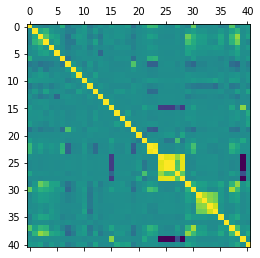

0         1         2         3         4         5         6   \
0   1.000000 -0.020052 -0.058971 -0.093249 -0.003462 -0.013393  0.265512   
1  -0.020052  1.000000  0.226445  0.310896  0.066348  0.010913 -0.007514   
2  -0.058971  0.226445  1.000000  0.456712  0.187555  0.130676 -0.014160   
3  -0.093249  0.310896  0.456712  1.000000  0.061801  0.164644 -0.017360   
4  -0.003462  0.066348  0.187555  0.061801  1.000000  0.043426 -0.003710   
5  -0.013393  0.010913  0.130676  0.164644  0.043426  1.000000  0.007337   
6   0.265512 -0.007514 -0.014160 -0.017360 -0.003710  0.007337  1.000000   
7  -0.160447 -0.105065 -0.211029 -0.160342 -0.127714 -0.052194 -0.195186   
8  -0.014995 -0.113112  0.027796 -0.153954 -0.031722 -0.021899 -0.048644   
9  -0.016074  0.045147  0.104433  0.058108 -0.020707  0.021082 -0.006714   
10  0.110578  0.074015  0.056614  0.051236  0.039895  0.012232  0.014171   
11 -0.165165 -0.063229 -0.115695 -0.036977 -0.118205 -0.042849  0.004491   
12 -0.031553  0.086774 -0.045592  0.162344  0.002119  0.023725  0.005980   
13  0.038759 -0.066130 -0.166347 -0.100670 -0.034777 -0.299329  0.023188   
14 -0.014063  0.024162  0.045608  0.033673 -0.005228 -0.008194 -0.018019   
15  0.100630  0.009244  0.016620  0.046987 -0.029427 -0.014183 -0.029030   
16  0.041409  0.038244  0.048181 -0.021111  0.037171 -0.006819  0.023513   
17  0.040364  0.027769  0.042940  0.013133  0.028606  0.002604  0.014323   
18  0.105922  0.002983 -0.013867 -0.055178  0.033005 -0.011875  0.023739   
19 -0.205380 -0.062770 -0.145501 -0.087223 -0.090093 -0.036507 -0.237255   
20 -0.015186 -0.006361 -0.003913 -0.001583 -0.001761 -0.003924  0.003649   
21  0.124468  0.014929  0.031629  0.023028  0.004163  0.018055  0.006843   
22  0.361652  0.042928  0.153551  0.039325  0.073475  0.026854  0.294200   
23  0.342694  0.023427  0.109089  0.001213  0.048805  0.018926  0.320523   
24  0.019934 -0.003232 -0.016640 -0.007437 -0.002323 -0.001230  0.003896   
25 -0.035438 -0.008513 -0.023820 -0.010504 -0.004829 -0.005456  0.001988   
26 -0.030441 -0.008333 -0.023171 -0.009931 -0.004752 -0.005209  0.002509   
27  0.165082  0.013536  0.024890  0.017541 -0.000448  0.014969  0.009055   
28 -0.017651 -0.007416 -0.023799 -0.011495 -0.008005 -0.007050  0.002528   
29 -0.074558  0.072630  0.548529  0.402322  0.174737  0.160499 -0.034313   
30  0.527521  0.137873  0.292232  0.246083  0.181195  0.067493  0.099412   
31 -0.033694  0.053827  0.138205  0.117827  0.065441  0.047758 -0.019291   
32 -0.018568  0.051611  0.131124  0.110198  0.062719  0.043236 -0.013439   
33 -0.005584  0.005688  0.045473  0.016204  0.066095  0.025264 -0.014538   
34  0.024025  0.005867  0.063295 -0.008988  0.108222  0.029246 -0.014736   
35 -0.100392  0.084597  0.197885  0.174755  0.073775  0.035465 -0.079386   
36 -0.065915  0.015789  0.016914  0.012699 -0.018283  0.003240 -0.013286   
37  0.473668  0.159749  0.334689  0.301696  0.008074  0.070985 -0.080960   
38 -0.022852  0.313429  0.679662  0.561844  0.223455  0.163749  0.072516   
39  0.033110  0.008193  0.024806  0.014361  0.002959  0.007033  0.000303   
40  0.098788  0.068962  0.149585 -0.051978  0.097236  0.008950  0.073463   

          7         8         9     ...           31        32        33  \
0  -0.160447 -0.014995 -0.016074    ...    -0.033694 -0.018568 -0.005584   
1  -0.105065 -0.113112  0.045147    ...     0.053827  0.051611  0.005688   
2  -0.211029  0.027796  0.104433    ...     0.138205  0.131124  0.045473   
3  -0.160342 -0.153954  0.058108    ...     0.117827  0.110198  0.016204   
4  -0.127714 -0.031722 -0.020707    ...     0.065441  0.062719  0.066095   
5  -0.052194 -0.021899  0.021082    ...     0.047758  0.043236  0.025264   
6  -0.195186 -0.048644 -0.006714    ...    -0.019291 -0.013439 -0.014538   
7   1.000000  0.074966 -0.013097    ...    -0.077127 -0.077024 -0.015035   
8   0.074966  1.000000  0.121042    ...    -0.028518 -0.028598 -0.011232   
9  -0.013097  0.121042  1.000000    ...     0.012946  0.0

In [21]:
getmatshow(train_1)

In [43]:
def getheatmap(df):
    sns.set(style="white")
    corrmat = df.corr()
    f, ax = plt.subplots(figsize=(11, 9))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.heatmap(corrmat, vmax=.8, square=True)
    plt.show()

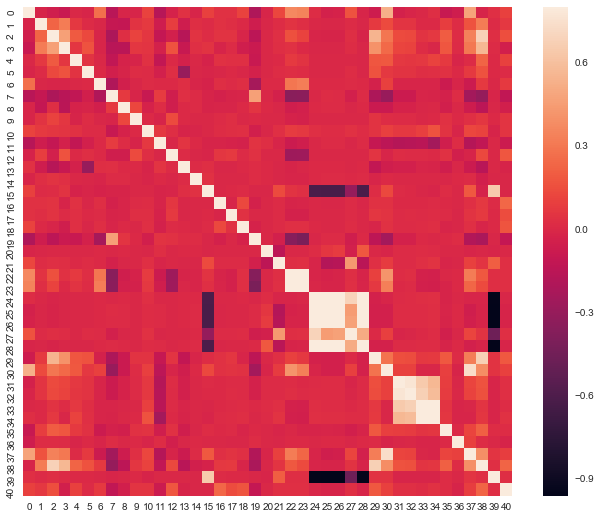

In [50]:
getheatmap(train_1)

In [73]:
train_0[4].value_counts()

 High school graduate                      43642
 Some college but no degree                26329
 Bachelors degree(BA AB BS)                19391
 Children                                  12710
 10th grade                                 6487
 Masters degree(MA MS MEng MEd MSW MBA)     6460
 7th and 8th grade                          6309
 11th grade                                 6213
 Associates degree-occup /vocational        5249
 9th grade                                  4976
 Associates degree-academic program         4322
 5th or 6th grade                           3139
 12th grade no diploma                      2059
 Prof school degree (MD DDS DVM LLB JD)     1791
 1st 2nd 3rd or 4th grade                   1755
 Doctorate degree(PhD EdD)                  1262
 Less than 1st grade                         802
Name: 4, dtype: int64

In [75]:
train_1[4].value_counts()

12    43642
16    26329
9     19391
10    12710
0      6487
14     6460
5      6309
1      6213
8      5249
6      4976
7      4322
4      3139
2      2059
15     1791
3      1755
11     1262
13      802
Name: 4, dtype: int64

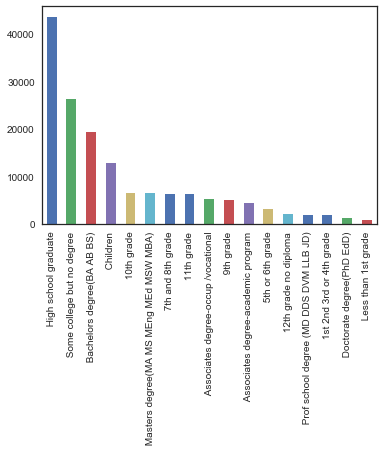

In [72]:
train_0[4].value_counts().plot(kind='bar')
plt.show()

In [71]:
train_0[14].value_counts()

 Not in universe          146884
 Other job loser            2038
 Re-entrant                 2017
 Job loser - on layoff       976
 Job leaver                  598
 New entrant                 383
Name: 14, dtype: int64

In [397]:
train_1[14].value_counts()

3    146884
4      2038
5      2017
1       976
0       598
2       383
Name: 14, dtype: int64

In [452]:
train_1[40].value_counts()

0    140529
1     12367
Name: 40, dtype: int64

one-hot encoding

In [105]:
def onehot(data,columns):
    newdata = data[:]
    x = newdata[columns]
    ohe = OneHotEncoder()
    ohe.fit(x)
    newx = ohe.transform(x).toarray()
    for i in range(len(columns)):
        clm_name = newdata[columns[i]].unique().tolist()
        for j in range(len(clm_name)):
            col_name = str(columns[i]) +"_"+ str(clm_name[j])
            newdata[col_name] = newx[:, i]
    newdata = newdata.drop(columns, axis=1)
    return newdata

normalization

In [118]:
def datanormalize(df):
    df_test = df[:]
    df_test = df_test.apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))
    return df_test

# GQ1-3 preprocess

In [220]:
train_gq1_init = train_1[ (train_1[4]==11) | (train_1[4]==14)]

In [221]:
train_gq1_cont = train_gq1_init[[0,4,5,12,38]]
train_gq1 = train_gq1_init[[0,1,4,5,7,10,12,34,38]]

In [172]:
nominal_lst_gq1 = [1,7,10,34]
train_gq1_oh = onehot(train_gq1, nominal_lst_gq1)

/Users/zoey/.local/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [173]:
train_gq1_norm = datanormalize(train_gq1)
train_gq1_new = datanormalize(train_gq1_oh)

In [178]:
train_gq1_cont

0   4     5   12  38
23      46  14     0   1  52
97      76  11     0   1  26
184     44  14     0   0  52
192     41  11     0   1  52
252     39  14     0   0  52
278     52  14     0   1  52
296     58  14     0   0  52
361     65  14     0   1   0
365     49  11     0   1  52
398     41  14     0   0  41
409     30  14     0   1  52
411     86  14     0   0   0
433     50  14     0   0   0
480     33  14     0   1  52
490     27  14     0   0  52
500     56  14     0   1  52
568     33  14     0   0  23
569     55  14     0   1  52
615     28  14     0   0  44
644     76  14     0   0  40
698     73  14     0   1   0
700     70  14     0   1   0
713     60  14     0   0  52
744     48  14     0   0  38
776     59  14     0   0   0
780     47  14     0   1  52
789     67  14     0   1   0
794     33  14     0   1  52
803     26  11     0   0  52
805     49  14     0   0  45
...     ..  ..   ...  ..  ..
198975  79  14     0   1   0
198981  58  14     0   1  52
198982  80  14     0   1   0
199014  51  14     0   1  52
199021  38  14     0   1  52
199032  34  11     0   1  52
199095  47  14  2160   1  52
199102  37  14     0   1  52
199137  31  11     0   0  52
199145  72  11     0   1   0
199153  57  14     0   0  52
199219  49  14     0   1  52
199240  38  14     0   1  52
199256  47  14     0   0  52
199264  55  11     0   1  52
199280  37  14     0   1  52
199283  43  14     0   1  52
199298  45  14     0   1  52
199312  43  14     0   0  52
199316  38  14     0   1  52
199337  54  14     0   1  52
199340  90  11     0   0   0
199356  29  14     0   1  32
199381  72  14     0   1   0
199454  36  14     0   1  52
199461  57  14     0   0  30
199470  46  14     0   0  25
199476  40  14     0   1  52
199485  90  14     0   0   0
199509  47  11     0   0  52

[7722 rows x 5 columns]

In [398]:
train_gq2_init = train_1[train_1[14]!=3]

In [402]:
train_gq2_cont = train_gq2_init[[0,4,12,38]]
train_gq2 = train_gq2_init[[0,1,4,7,10,12,34,38]]
nominal_lst_gq2 = [1,7,10,34]
train_gq2_oh = onehot(train_gq2, nominal_lst_gq2)
train_gq2_norm = datanormalize(train_gq2)
train_gq2_new = datanormalize(train_gq2_oh)

/Users/zoey/.local/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [453]:
train_gq3_init = train_1[train_1[40]==1]

In [454]:
train_gq3 = train_gq3_init[[0,1,4,7,10,12,34,38]]
nominal_lst_gq3 = [1,7,10,34]
train_gq3_oh = onehot(train_gq3, nominal_lst_gq3)
train_gq3_norm = datanormalize(train_gq3)
train_gq3_new = datanormalize(train_gq3_oh)

/Users/zoey/.local/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


# GQ1@K-means

In [218]:
from sklearn import cluster
from sklearn.metrics import silhouette_samples, silhouette_score, adjusted_rand_score, homogeneity_score
import matplotlib.cm as cm

In [159]:
def selectK(df):
    Kmean_score = np.zeros((30,1))
    for i in range(30):
        k_means = cluster.KMeans(n_clusters=i+1, random_state=0).fit(df)
        Kmean_score[i] = k_means.inertia_
    Kmean_score = np.concatenate(Kmean_score)
    
    plt.plot(np.arange(1,31), Kmean_score, lw=2)
    plt.xlabel('number of clusters')
    plt.ylabel('SSE')
    plt.title('Optimal cluster number by K means method')
    plt.show()
    
    return Kmean_score

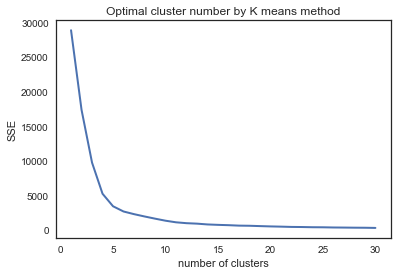

array([28879.38375401, 17362.01814285,  9722.81646704,  5218.5135547 ,
        3405.31694814,  2649.45955511,  2263.91148987,  1928.55902562,
        1612.9574585 ,  1314.91902282,  1082.85074714,   956.30940351,
         889.01253471,   773.87612483,   713.62594742,   667.22811928,
         602.74304828,   582.54543291,   533.84700823,   488.73853632,
         455.80524644,   414.71189987,   399.8743484 ,   370.0046055 ,
         361.41609645,   333.64952431,   320.95464517,   304.93470969,
         295.84809979,   270.99585635])

In [160]:
selectK(train_gq1_new)

In [234]:
def useKmeans(df,k):
    df_new = df[:]
    kmeans = cluster.KMeans(n_clusters = k,  random_state = 0, max_iter=300)
    y_kmeans = kmeans.fit_predict(df)
    df_new['y_kmeans'] = y_kmeans
    
    for label in list(df.columns):
        sns.violinplot(x='y_kmeans', y=label, data=df_new)
        plt.show()
        
    print("SSE: ", kmeans.inertia_)
    print("# iter: ", kmeans.n_iter_)
    print("% instances per cluster: ", np.bincount(y_kmeans)/len(y_kmeans))
    
    return y_kmeans

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


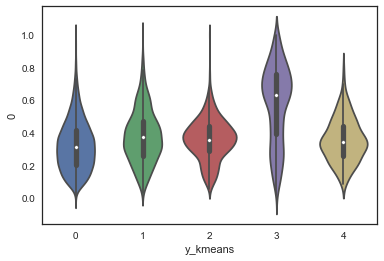

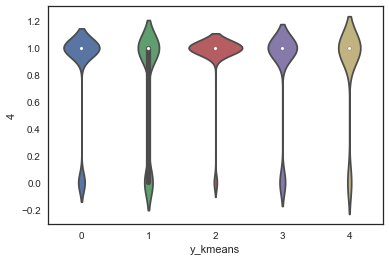

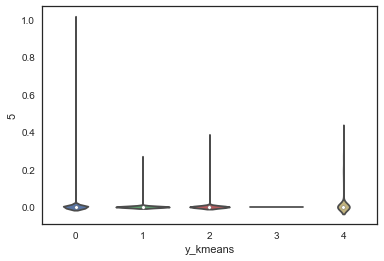

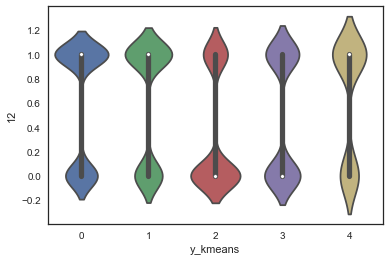

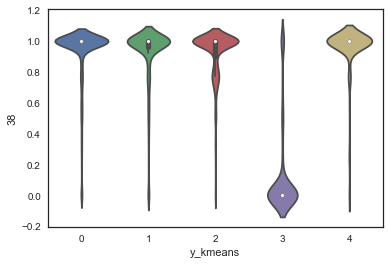

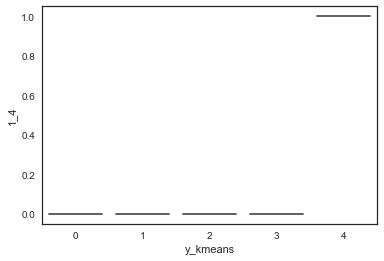

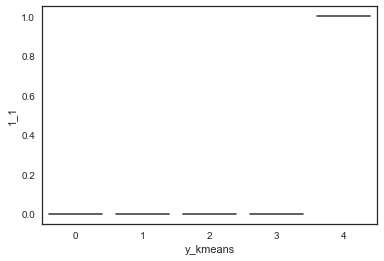

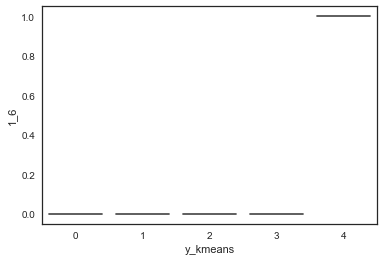

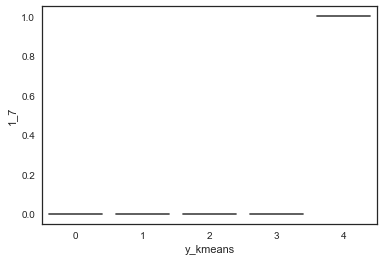

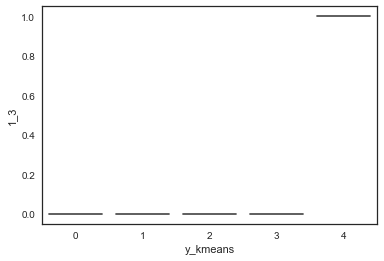

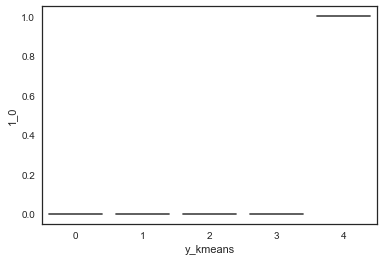

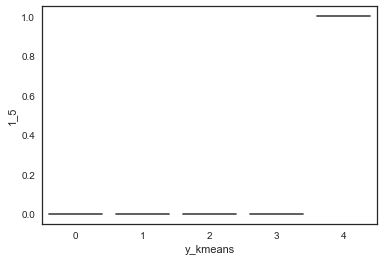

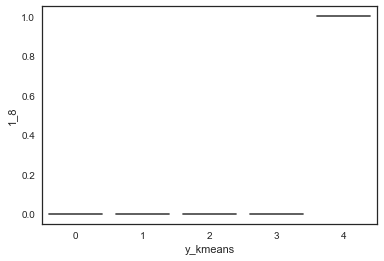

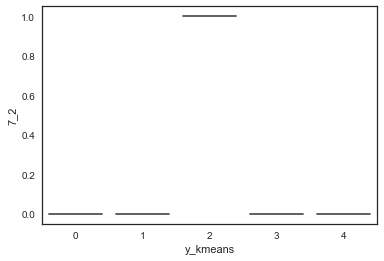

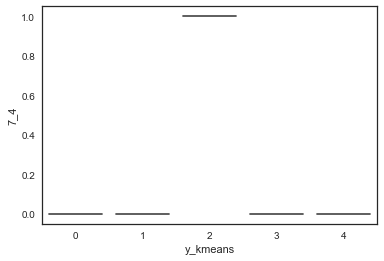

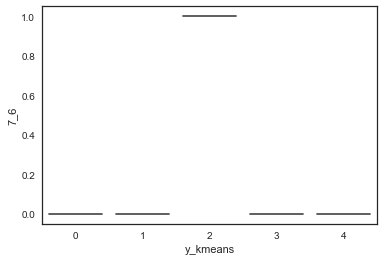

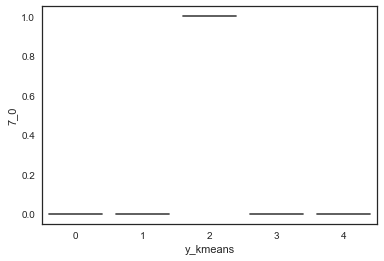

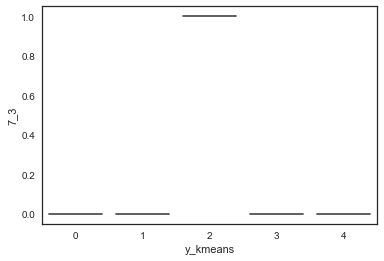

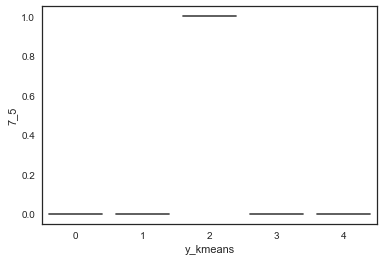

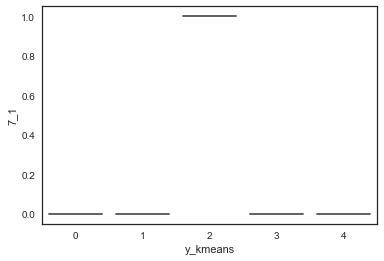

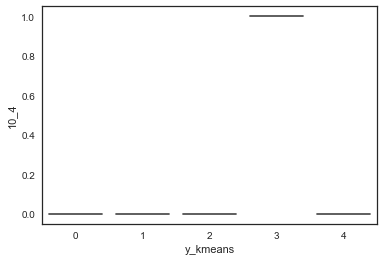

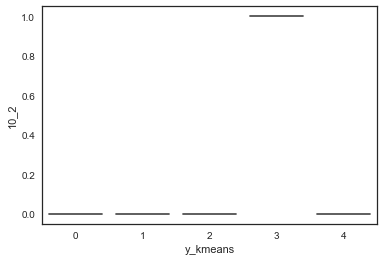

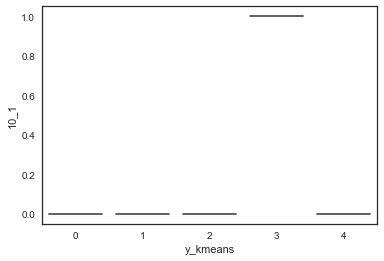

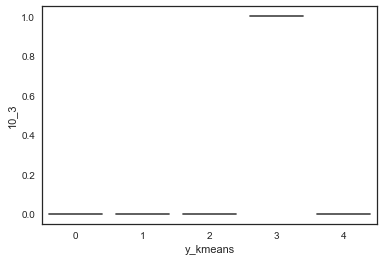

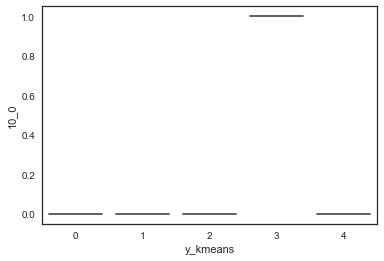

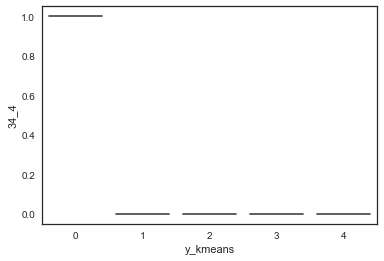

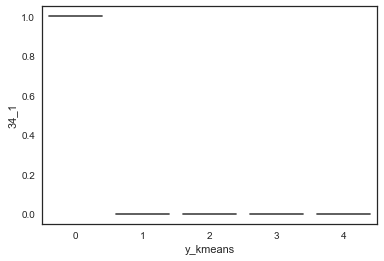

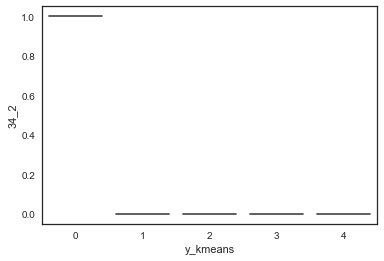

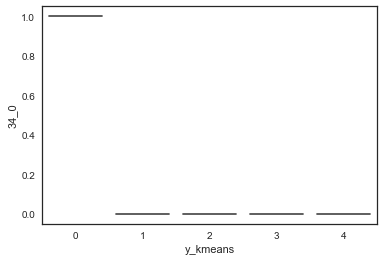

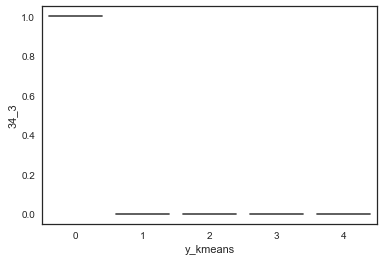

SSE:  3405.3169481363598
# iter:  2
% instances per cluster:  [0.41491841 0.20849521 0.17391867 0.16860917 0.03405853]


In [235]:
gq1_kmeans5 = useKmeans(train_gq1_new,5)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


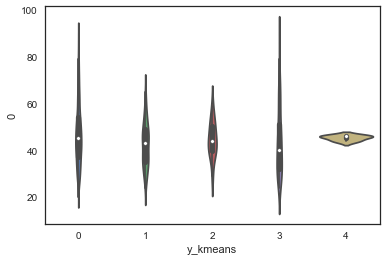

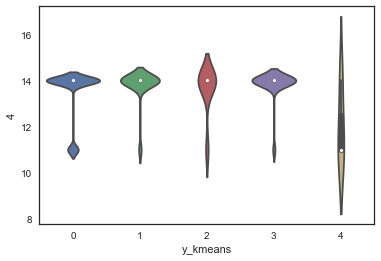

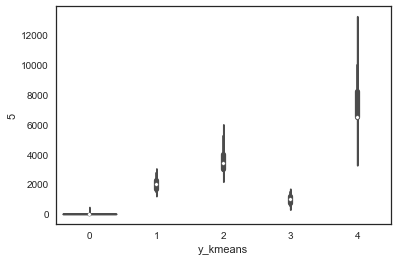

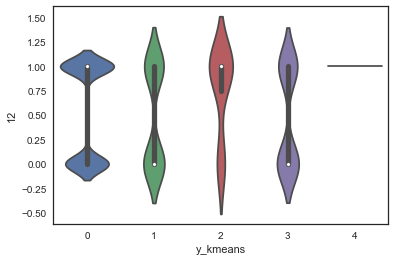

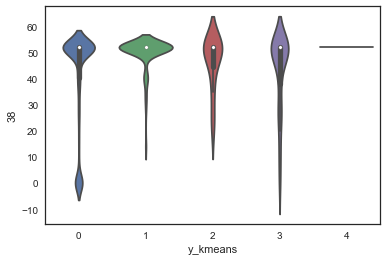

SSE:  39949572.05432061
# iter:  4
% instances per cluster:  [9.71768972e-01 1.26910127e-02 2.07200207e-03 1.30795131e-02
 3.88500389e-04]


array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [236]:
useKmeans(train_gq1_cont,5)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


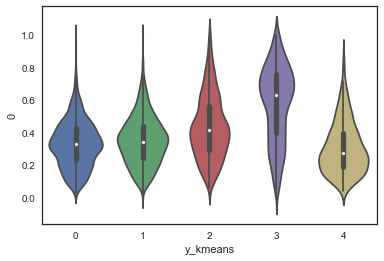

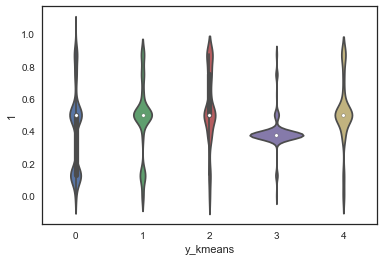

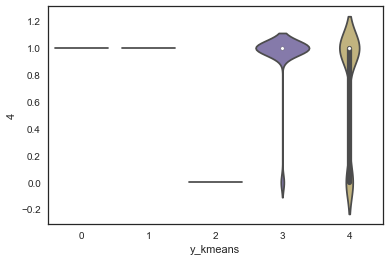

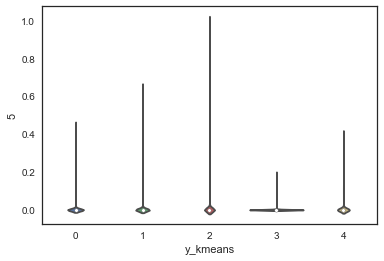

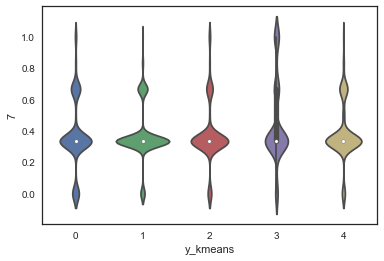

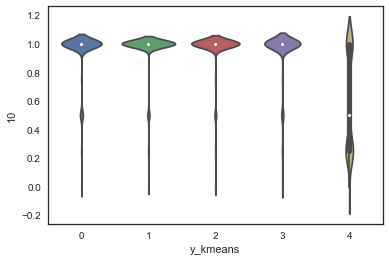

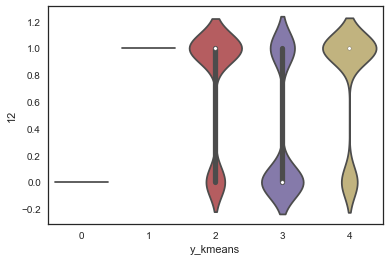

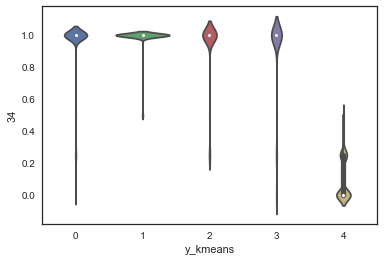

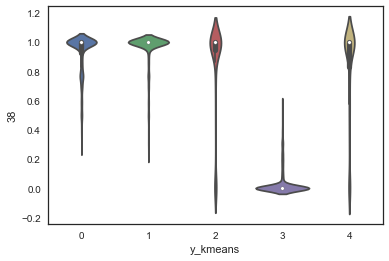

SSE:  2364.865085483823
# iter:  10
% instances per cluster:  [0.3021238  0.33100233 0.13196063 0.14270914 0.09220409]


array([1, 2, 0, ..., 4, 3, 2], dtype=int32)

In [237]:
useKmeans(train_gq1_norm,5)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


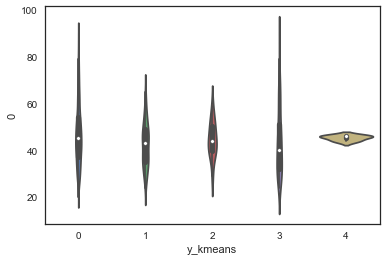

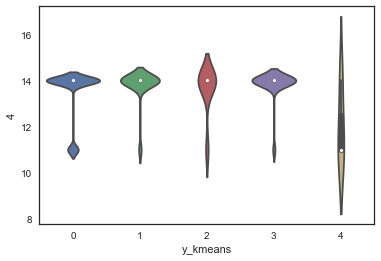

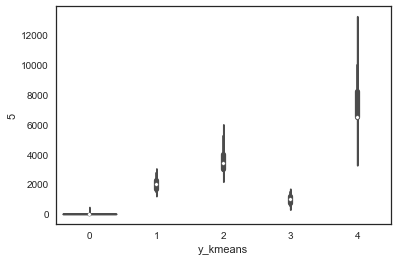

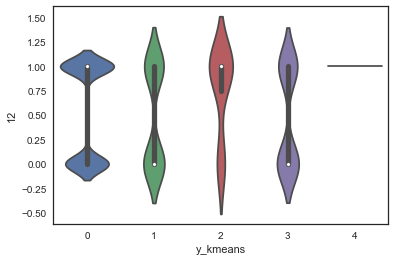

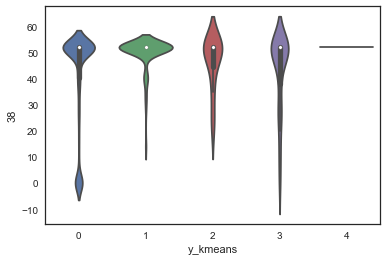

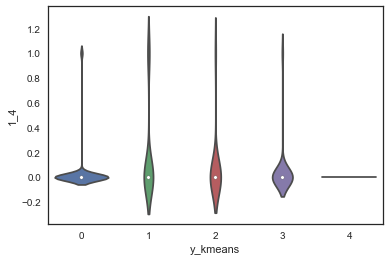

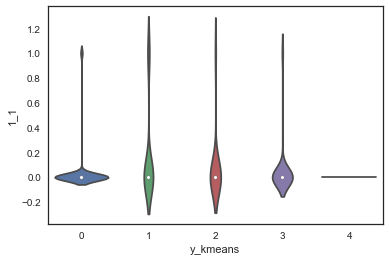

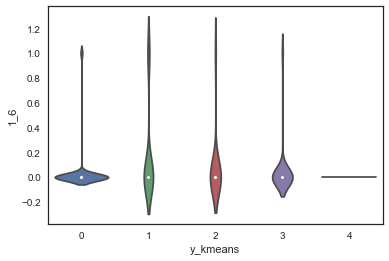

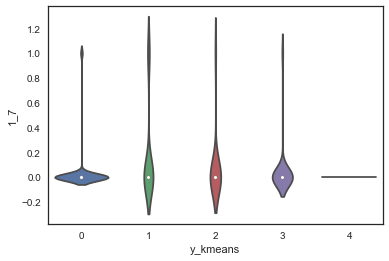

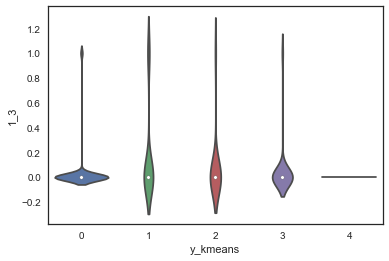

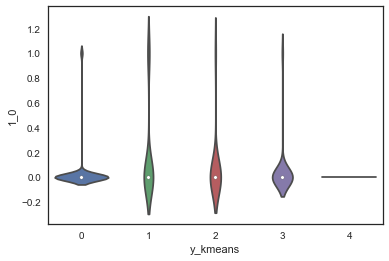

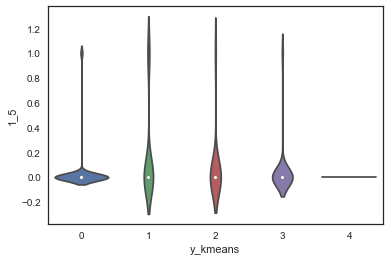

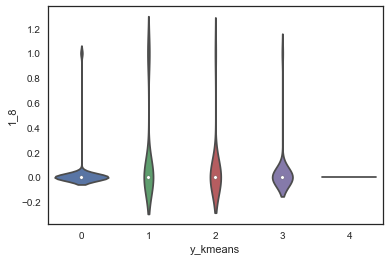

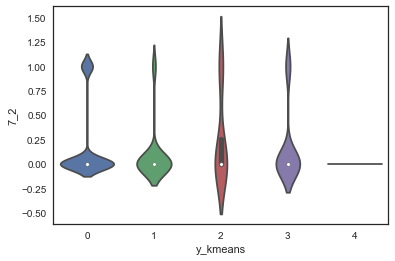

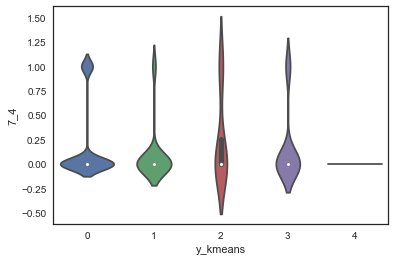

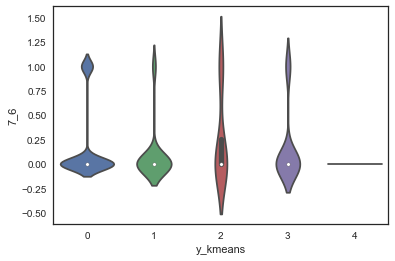

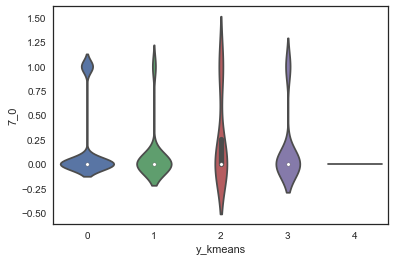

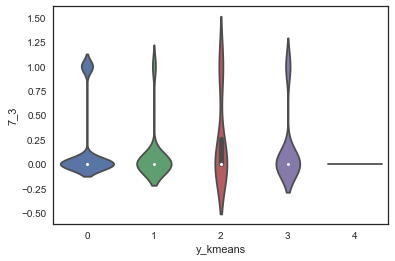

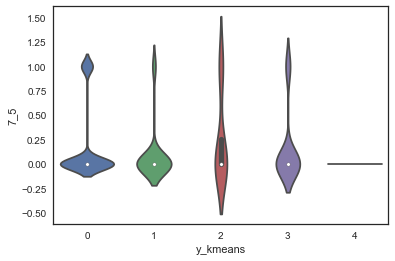

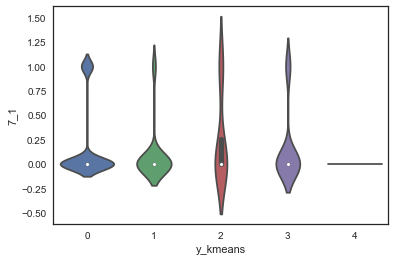

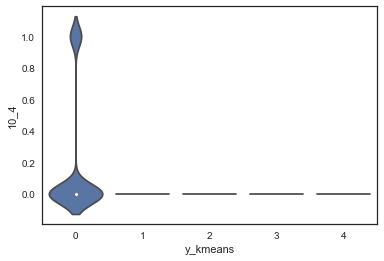

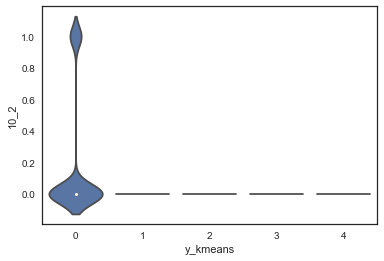

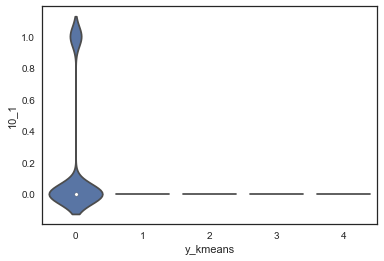

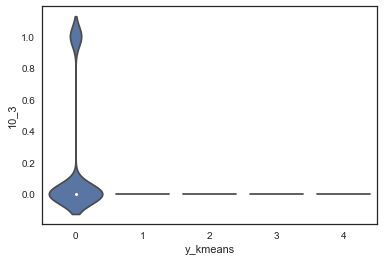

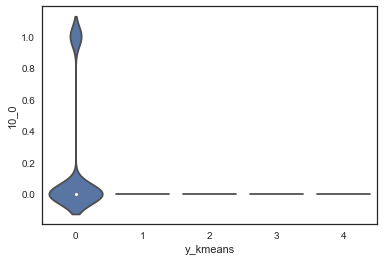

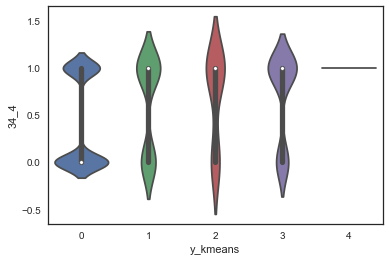

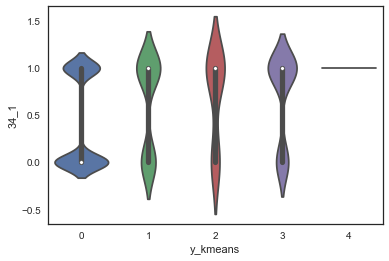

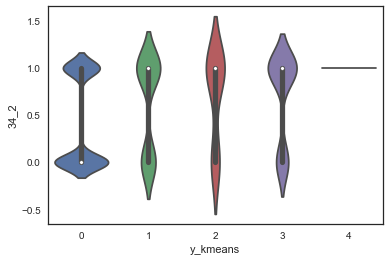

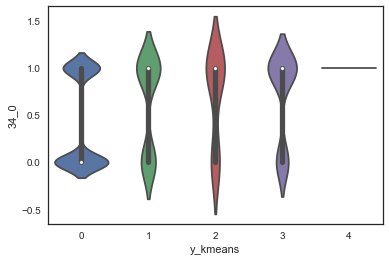

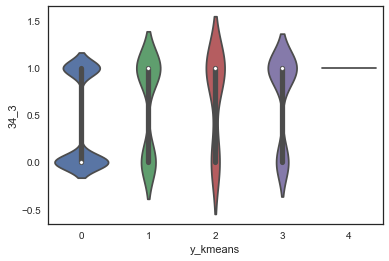

SSE:  39974026.89005555
# iter:  4
% instances per cluster:  [9.71768972e-01 1.26910127e-02 2.07200207e-03 1.30795131e-02
 3.88500389e-04]


array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [238]:
useKmeans(train_gq1_oh,5)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


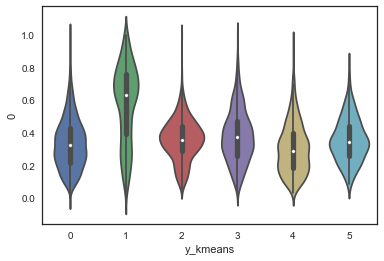

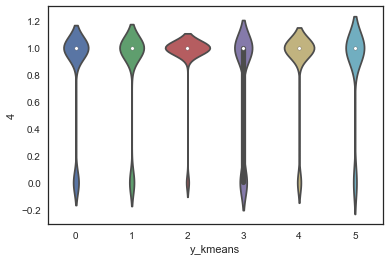

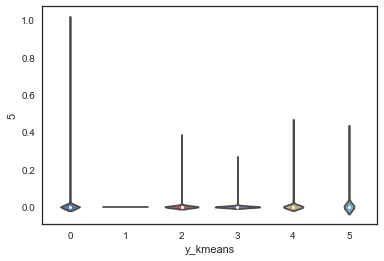

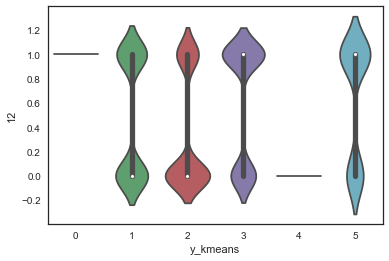

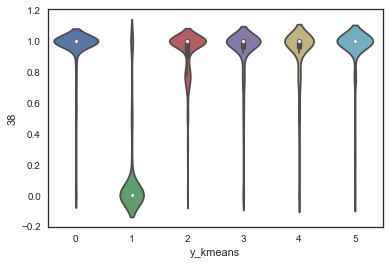

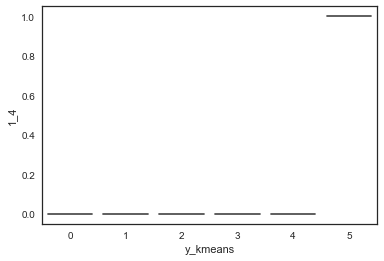

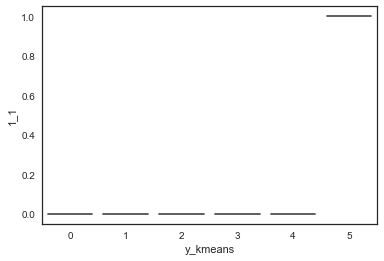

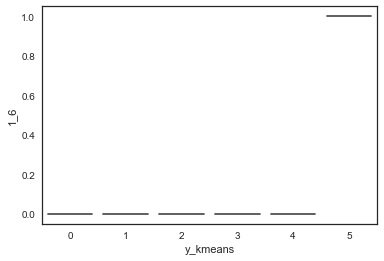

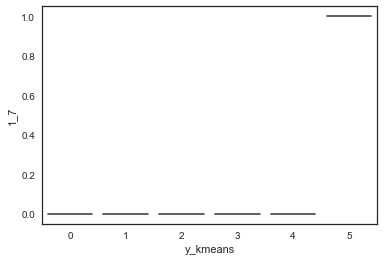

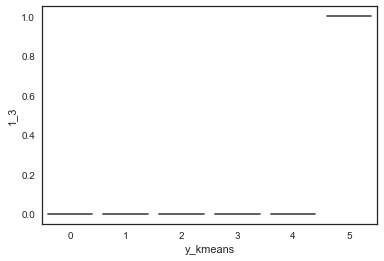

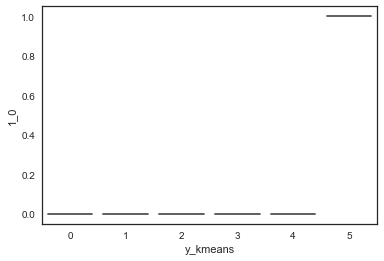

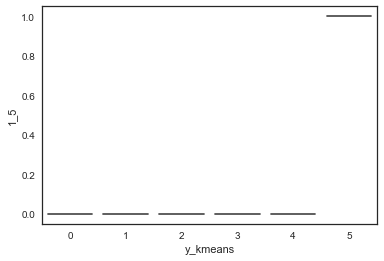

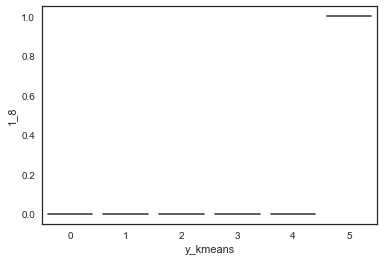

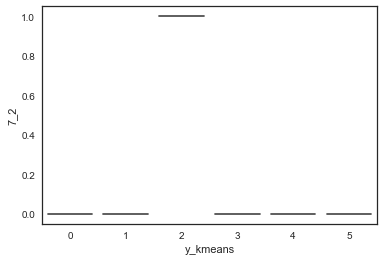

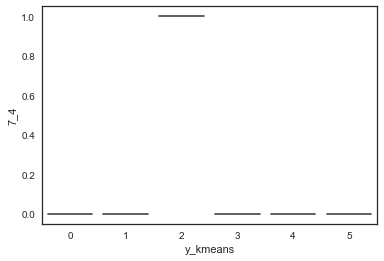

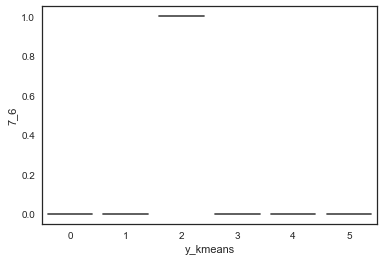

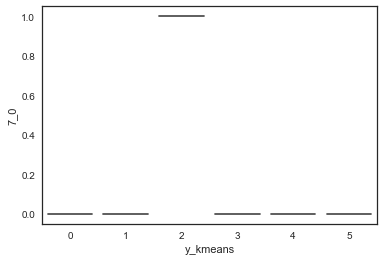

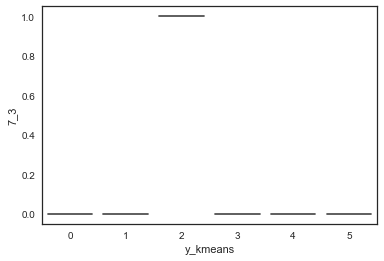

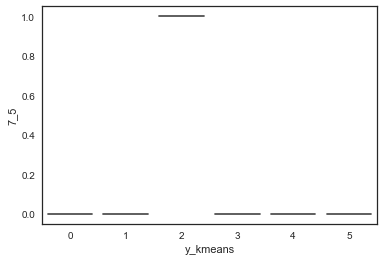

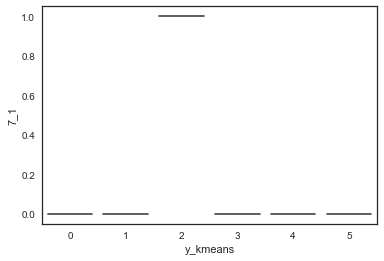

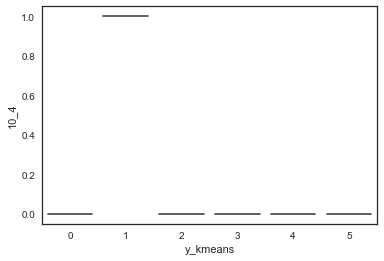

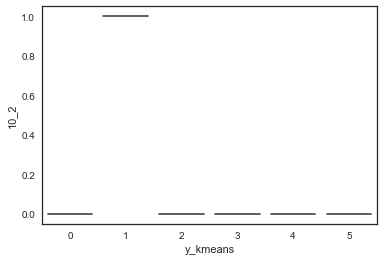

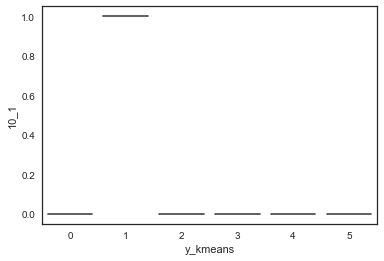

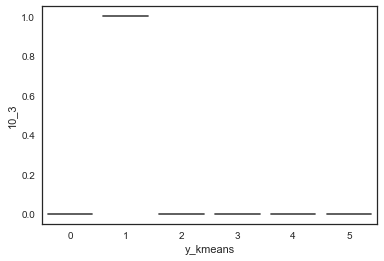

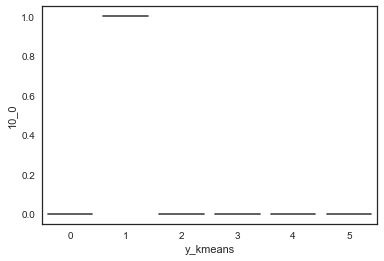

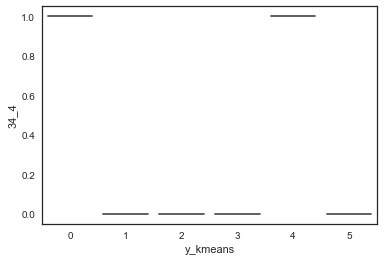

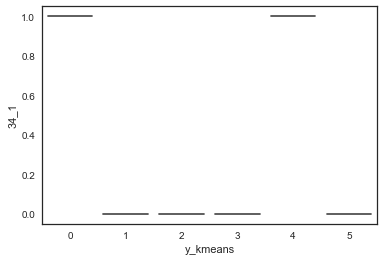

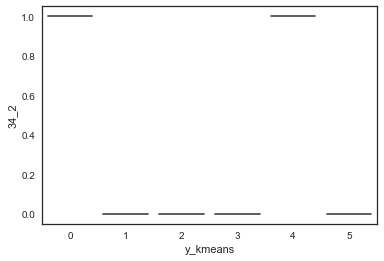

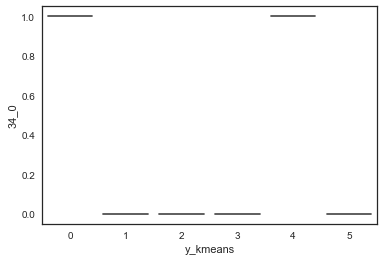

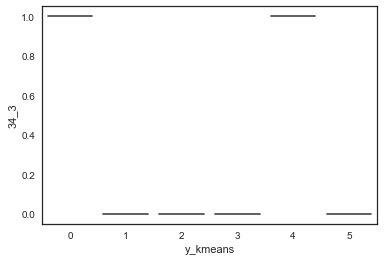

SSE:  2649.459555113831
# iter:  2
% instances per cluster:  [0.25977726 0.16860917 0.17391867 0.20849521 0.15514116 0.03405853]


In [239]:
gq1_kmeans6 = useKmeans(train_gq1_new,6)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


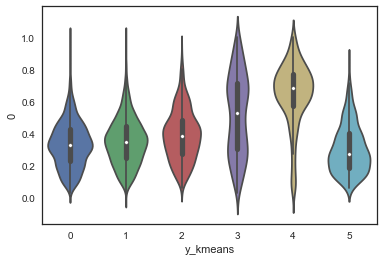

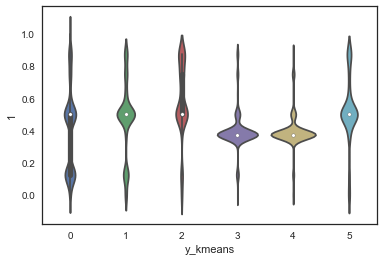

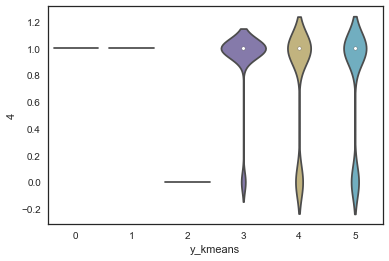

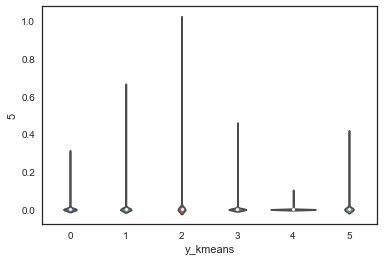

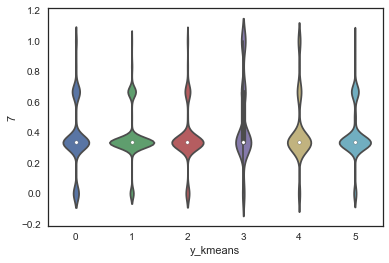

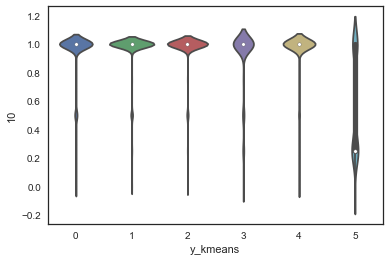

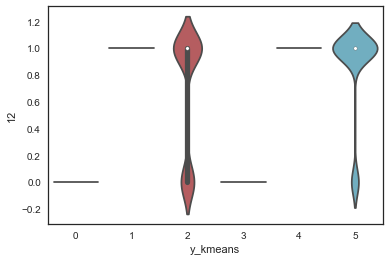

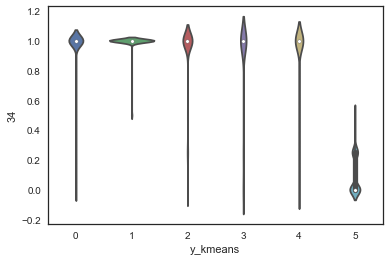

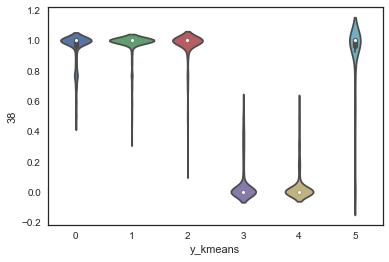

SSE:  2056.5414254229745
# iter:  7
% instances per cluster:  [0.3008288  0.32543383 0.11680912 0.0995856  0.07731158 0.08003108]


array([1, 2, 0, ..., 5, 3, 2], dtype=int32)

In [240]:
useKmeans(train_gq1_norm,6)

Quantitative Evaluation

In [198]:
def plot_silhouette(X, cluster_labels):
    n_clusters = len(set(cluster_labels))
    silhouette_avg = silhouette_score(X, cluster_labels)
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    
    ax = plt.gca()
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10
    ax.set_title("The silhouette plot for the various clusters.")
    ax.set_xlabel("The silhouette coefficient values")
    ax.set_ylabel("Cluster label")
    
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax.set_yticks([]) 
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.show()

Silhouette Score:  0.679632085389883


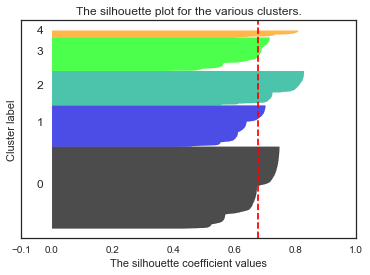

In [213]:
gq1_kmeans_silh5 = silhouette_score(train_gq1_new, gq1_kmeans5)
print("Silhouette Score: ", gq1_kmeans_silh5)
plot_silhouette(train_gq1_new, gq1_kmeans5)

Silhouette Score:  0.6484511226452283


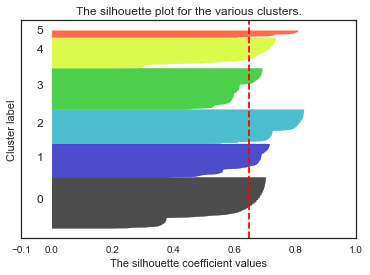

In [212]:
gq1_kmeans_silh6 = silhouette_score(train_gq1_new, gq1_kmeans6)
print("Silhouette Score: ", gq1_kmeans_silh6)
plot_silhouette(train_gq1_new, gq1_kmeans6)

In [216]:
adjusted_rand_score(gq1_kmeans6,gq1_kmeans5)

0.7778389869433611

In [232]:
#[0,1,4,5,7,10,12,34,38]are used in clustering
for i in range(40):
    print(i,homogeneity_score(gq1_kmeans5,train_gq1_init[i]))
for i in range(40):
    print(i,homogeneity_score(gq1_kmeans6,train_gq1_init[i]))

0 0.1005527999923377
1 0.8372924907947963
2 0.4750251210903547
3 0.4168125975337868
4 0.012603594771167294
5 0.019710665549750407
6 0.00030525430064085035
7 0.01953586334100801
8 0.4598477705303594
9 0.30488938416734335
10 0.004902297669438932
11 0.002851353995427328
12 0.17854242581796873
13 0.0430578228712034
14 0.00383094072279022
15 0.1286981678725983
16 0.028056868101413904
17 0.01895036582578728
18 0.08795784835645454
19 0.06296855399992442
20 0.0032218384616911305
21 0.013062199704571164
22 0.037968217170414494
23 0.026424189972470685
24 0.003450539057522499
25 0.0036792780320314706
26 0.004575873600800286
27 0.0012311479526353857
28 0.0013348649136234287
29 0.2160756966668498
30 8.233072000455569e-17
31 0.017406664167915465
32 0.018791658306249886
33 0.017070988010912252
34 0.007308554614266502
35 0.014872197227028594
36 0.00261997504822754
37 0.0024458688491709162
38 0.19790595939004063
39 0.0001177182009206879


Quanlitative Evaluation

In [391]:
from sklearn.manifold import MDS
from sklearn.metrics.pairwise import cosine_similarity

In [389]:
def plot_sim_matrix(X, labels):
    t = labels.reshape(7722, -1)
    X_with_label = np.concatenate((X, t), axis=1)
    X_label_sorted = X_with_label[X_with_label[:, -1].argsort()]
    X_sorted = np.delete(X_label_sorted, -1, 1)
    X_act_sim = cosine_similarity(X_sorted)
    plt.imshow(X_act_sim, cmap=plt.cm.gnuplot2, interpolation='nearest')
    plt.colorbar()
    plt.show()

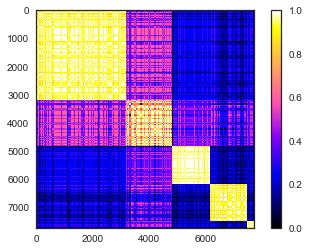

In [392]:
plot_sim_matrix(train_gq1_new, gq1_kmeans5)

In [380]:
mds = MDS(n_components=2)
train_gq1_mds = mds.fit_transform(train_gq1_new)

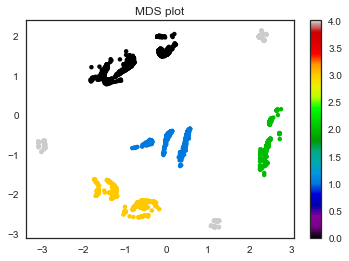

In [381]:
plt.scatter(train_gq1_mds[:, 0], train_gq1_mds[:, 1], s=20, c=gq1_kmeans5, cmap = "nipy_spectral", edgecolor = "None")
plt.colorbar()
plt.title("MDS plot")
plt.show()

# GQ1@Hierarchical

In [250]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from datetime import datetime

In [242]:
def plot_dendrogram(X, method="ward", truncate_mode=None, title="Dendrogram"):
    plt.figure()
    h_d = sch.dendrogram(sch.linkage(X, method=method),
                         truncate_mode=truncate_mode)
    plt.title(title)
    plt.show()

In [257]:
def useHierarchical(df,method_use,k):
    
    df_new = df[:]
    time0 = datetime.now()
    clustering = AgglomerativeClustering(n_clusters = k,linkage = method_use)
    y_hier = clustering.fit_predict(df)
    time1 = datetime.now()
    
    print("Time taken: ", (time1 - time0).microseconds/100000 + (time1 - time0).seconds)
    print("% instances per cluster: ", np.bincount(clustering.labels_)/len(clustering.labels_))
    plot_dendrogram(df, method=method_use, truncate_mode="lastp")
    return y_hier

Time taken:  9.67695
% instances per cluster:  [0.41491841 0.20849521 0.17391867 0.16860917 0.03405853]


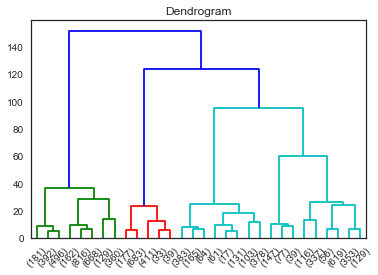

Time taken:  4.85403
% instances per cluster:  [0.27648278 0.20849521 0.17391867 0.16860917 0.03405853 0.13843564]


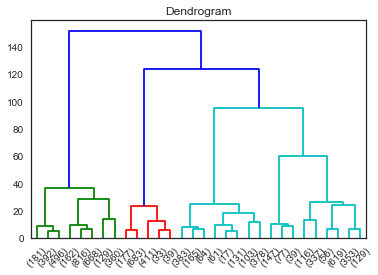

In [268]:
gq1_hier5w = useHierarchical(train_gq1_new,'ward',5)
gq1_hier6w = useHierarchical(train_gq1_new,'ward',6)

Time taken:  6.3776600000000006
% instances per cluster:  [0.41491841 0.16860917 0.17391867 0.03405853 0.20849521]


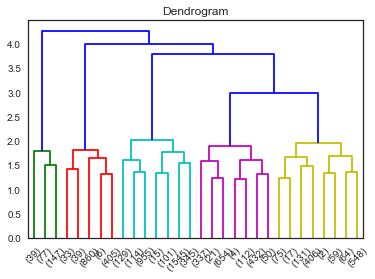

Time taken:  6.36642
% instances per cluster:  [0.16860917 0.20849521 0.17391867 0.03405853 0.25977726 0.15514116]


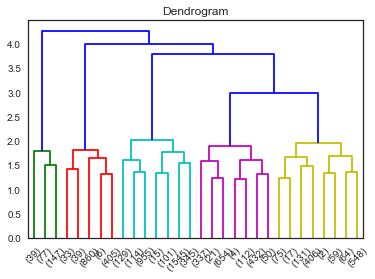

In [269]:
gq1_hier5c = useHierarchical(train_gq1_new,'complete',5)
gq1_hier6c = useHierarchical(train_gq1_new,'complete',6)

Time taken:  8.70396
% instances per cluster:  [0.20849521 0.16860917 0.17391867 0.03405853 0.41491841]


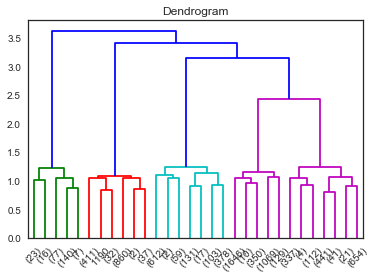

Time taken:  7.85197
% instances per cluster:  [0.16860917 0.03405853 0.17391867 0.14983165 0.41491841 0.05866356]


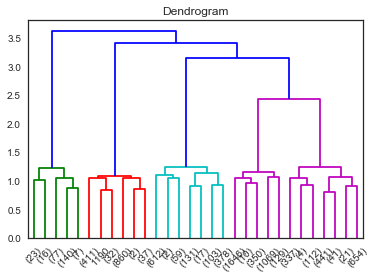

In [270]:
gq1_hier5a = useHierarchical(train_gq1_new,'average',5)
gq1_hier6a = useHierarchical(train_gq1_new,'average',6)

Time taken:  2.90199
% instances per cluster:  [0.03405853 0.16860917 0.17391867 0.20849521 0.41491841]


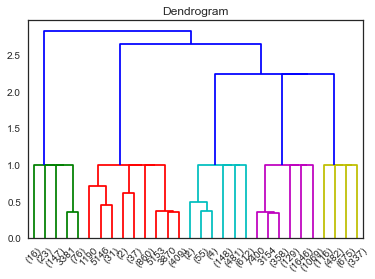

Time taken:  3.5519499999999997
% instances per cluster:  [0.03198653 0.16860917 0.17391867 0.20849521 0.41491841 0.002072  ]


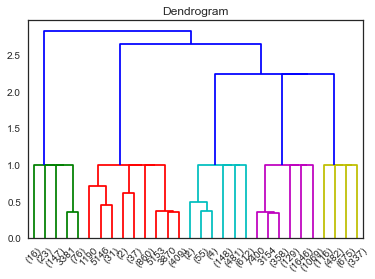

In [283]:
gq1_hier5s = useHierarchical(train_gq1_new,'single',5)
gq1_hier6s = useHierarchical(train_gq1_new,'single',6)

Silhouette Score:  0.679632085389883


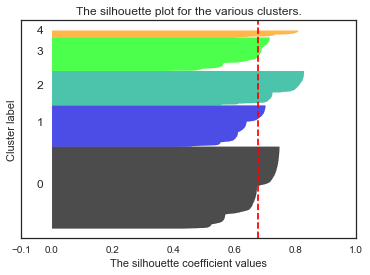

In [272]:
gq1_hier_silh5w = silhouette_score(train_gq1_new, gq1_hier5w)
print("Silhouette Score: ", gq1_hier_silh5w)
plot_silhouette(train_gq1_new, gq1_hier5w)

Silhouette Score:  0.679632085389883


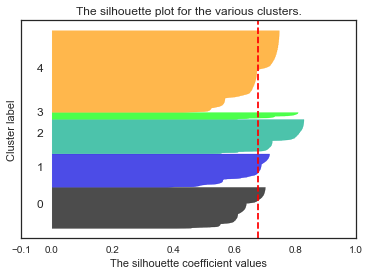

In [277]:
gq1_hier_silh5a = silhouette_score(train_gq1_new, gq1_hier5a)
print("Silhouette Score: ", gq1_hier_silh5a)
plot_silhouette(train_gq1_new, gq1_hier5a)

Silhouette Score:  0.679632085389883


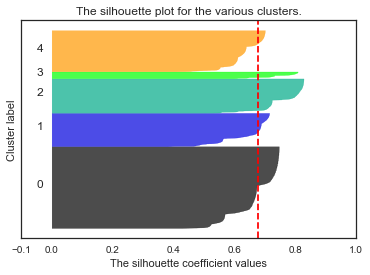

In [278]:
gq1_hier_silh5c = silhouette_score(train_gq1_new, gq1_hier5c)
print("Silhouette Score: ", gq1_hier_silh5c)
plot_silhouette(train_gq1_new, gq1_hier5c)

Silhouette Score:  0.679632085389883


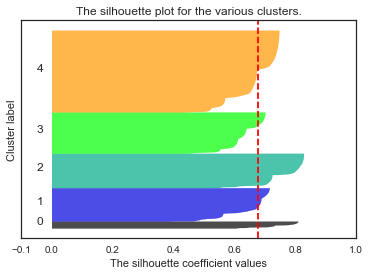

In [284]:
gq1_hier_silh5s = silhouette_score(train_gq1_new, gq1_hier5s)
print("Silhouette Score: ", gq1_hier_silh5s)
plot_silhouette(train_gq1_new, gq1_hier5s)

Silhouette Score:  0.6484511226452283


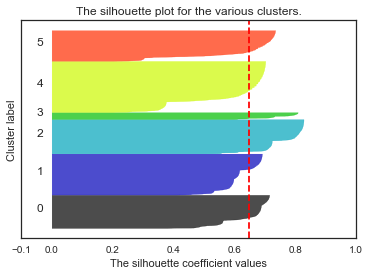

In [275]:
gq1_hier_silh6c = silhouette_score(train_gq1_new, gq1_hier6c)
print("Silhouette Score: ", gq1_hier_silh6c)
plot_silhouette(train_gq1_new, gq1_hier6c)

Silhouette Score:  0.635138257890607


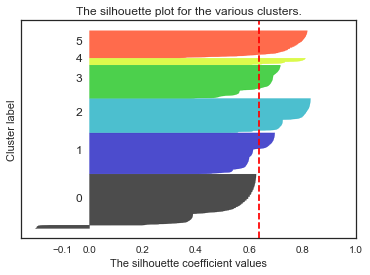

In [280]:
gq1_hier_silh6w = silhouette_score(train_gq1_new, gq1_hier6w)
print("Silhouette Score: ", gq1_hier_silh6w)
plot_silhouette(train_gq1_new, gq1_hier6w)

Silhouette Score:  0.642737702035426


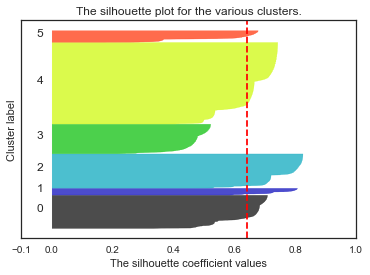

In [281]:
gq1_hier_silh6a = silhouette_score(train_gq1_new, gq1_hier6a)
print("Silhouette Score: ", gq1_hier_silh6a)
plot_silhouette(train_gq1_new, gq1_hier6a)

Silhouette Score:  0.6693963537836979


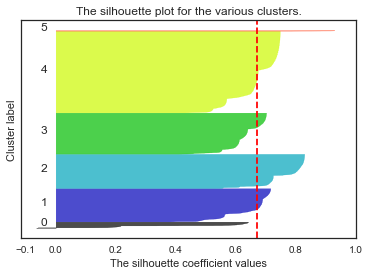

In [285]:
gq1_hier_silh6s = silhouette_score(train_gq1_new, gq1_hier6s)
print("Silhouette Score: ", gq1_hier_silh6s)
plot_silhouette(train_gq1_new, gq1_hier6s)

In [289]:
print(adjusted_rand_score(gq1_hier6s,gq1_hier6c))
print(adjusted_rand_score(gq1_hier6s,gq1_hier6a))
print(adjusted_rand_score(gq1_hier6s,gq1_hier6w))
print(adjusted_rand_score(gq1_hier6c,gq1_hier6a))
print(adjusted_rand_score(gq1_hier6c,gq1_hier6w))
print(adjusted_rand_score(gq1_hier6a,gq1_hier6w))

0.7774240046871601
0.9547091630924566
0.7896573018401786
0.721138437611225
0.9579079933533554
0.7341360239589744


In [292]:
print(adjusted_rand_score(gq1_hier5s,gq1_hier6s))
print(adjusted_rand_score(gq1_hier5c,gq1_hier6c))
print(adjusted_rand_score(gq1_hier5a,gq1_hier6a))
print(adjusted_rand_score(gq1_hier5w,gq1_hier6w))

0.9996677652655047
0.7778389869433611
0.9550554909037571
0.7900668763812271


In [298]:
#[0,1,4,5,7,10,12,34,38]are used in clustering
for i in range(40):
    print("s:",i,homogeneity_score(gq1_hier5s,train_gq1_init[i]))
for i in range(40):
    print("c:",i,homogeneity_score(gq1_hier5c,train_gq1_init[i]))
for i in range(40):
    print("a:",i,homogeneity_score(gq1_hier5a,train_gq1_init[i]))
for i in range(40):
    print("w:",i,homogeneity_score(gq1_hier5w,train_gq1_init[i]))

s: 0 0.11409875377933876
s: 1 0.9999999999999999
s: 2 0.54250401831641
s: 3 0.4708378669319397
s: 4 0.013622418102737503
s: 5 0.018050910147445493
s: 6 0.00026534622257184373
s: 7 0.01586433652393654
s: 8 0.5270543847372982
s: 9 0.3594703649352196
s: 10 0.005553057869893387
s: 11 0.002887326950256484
s: 12 0.018912048999429016
s: 13 0.051235594031773975
s: 14 0.004528491635963198
s: 15 0.1528536787038998
s: 16 0.026833202864218978
s: 17 0.01703340852238605
s: 18 0.08960840029761988
s: 19 0.06792909335996068
s: 20 0.0035748231465689393
s: 21 0.013756515370301238
s: 22 0.01233311912503754
s: 23 0.009546916179095782
s: 24 0.0039204780633951145
s: 25 0.004122186939430273
s: 26 0.0053588815800468485
s: 27 0.0014610009630419373
s: 28 0.0015739604963201854
s: 29 0.2565374723131538
s: 30 -1.9665940136738507e-17
s: 31 0.01840761891324064
s: 32 0.019313024439177852
s: 33 0.017222965768428918
s: 34 0.00754848884418829
s: 35 0.017580498220430903
s: 36 0.0023944678565969314
s: 37 0.0022065766098664

In [299]:
#[0,1,4,5,7,10,12,34,38]are used in clustering
for i in range(40):
    print("s:",i,homogeneity_score(gq1_hier6s,train_gq1_init[i]))
for i in range(40):
    print("c:",i,homogeneity_score(gq1_hier6c,train_gq1_init[i]))
for i in range(40):
    print("a:",i,homogeneity_score(gq1_hier6a,train_gq1_init[i]))
for i in range(40):
    print("w:",i,homogeneity_score(gq1_hier6w,train_gq1_init[i]))

s: 0 0.11507852877507349
s: 1 0.9944979024255806
s: 2 0.5402375547202095
s: 3 0.46980220142158957
s: 4 0.016640430333019755
s: 5 0.018077114811023934
s: 6 0.00026388626176425964
s: 7 0.016672424334309575
s: 8 0.5246115584559745
s: 9 0.35769414839761293
s: 10 0.005542222013641474
s: 11 0.0030749307721190827
s: 12 0.0204139096506783
s: 13 0.051142851989466546
s: 14 0.004562003947300448
s: 15 0.15221371800400021
s: 16 0.026911806745837735
s: 17 0.017571390675976708
s: 18 0.09014612784015225
s: 19 0.06813880923055422
s: 20 0.00369420342715992
s: 21 0.013981489934257045
s: 22 0.01277932427773723
s: 23 0.00961372289356617
s: 24 0.004097735797169405
s: 25 0.004384297765923764
s: 26 0.005614187991957904
s: 27 0.001593616342393799
s: 28 0.0017227099641834351
s: 29 0.25548083411899364
s: 30 1.9557736215213482e-17
s: 31 0.018837120814545093
s: 32 0.019588113165296555
s: 33 0.01764675603898366
s: 34 0.007639022839883593
s: 35 0.017548841183732396
s: 36 0.002433772535800012
s: 37 0.0022469150850423

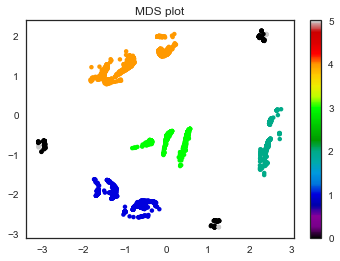

In [393]:
plt.scatter(train_gq1_mds[:, 0], train_gq1_mds[:, 1], s=20, c=gq1_hier6s, cmap = "nipy_spectral", edgecolor = "None")
plt.colorbar()
plt.title("MDS plot")
plt.show()

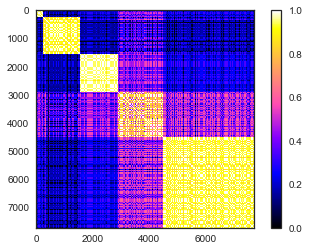

In [394]:
plot_sim_matrix(train_gq1_new, gq1_hier6s)

# GQ1@DBSCAN

In [305]:
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

In [301]:
def plot_knn_distance(X, k=5, title="knn distance"):
    nn_c = NearestNeighbors(n_neighbors=k).fit(X)
    distances, indices = nn_c.kneighbors(X)
    k_dis = np.amax(distances, axis=1)
    k_dis = np.sort(k_dis)
    plt.figure()
    plt.plot(k_dis)
    plt.ylabel("Distance")
    plt.xlabel("Number of data")
    plt.title(title)
    plt.show()

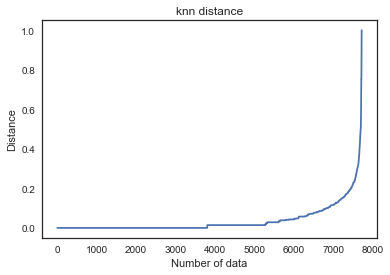

In [303]:
plot_knn_distance(train_gq1_new,k=10)

In [313]:
def plot_dbscan(X, dbscan):
    db = dbscan.fit(X)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_
    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)

    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each)
              for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = [0, 0, 0, 1]

        class_member_mask = (labels == k)

        xy = X[class_member_mask & core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=14)

        xy = X[class_member_mask & ~core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=6)

    plt.title('Estimated number of clusters: %d' % n_clusters_)
    plt.show()

In [320]:
def useDBSCAN(df,eps=0.2,k):
    time0 = datetime.now()
    clustering = DBSCAN(eps, min_samples=k)
    y_dbs = clustering.fit_predict(df)
    time1 = datetime.now()
    y_dbs_ls = np.array([x for x in y_dbs if x!=-1])
    print("Time taken: ", (time1 - time0).microseconds/100000 + (time1 - time0).seconds)
    print("% instances per cluster: ", np.bincount(y_dbs_ls)/len(y_dbs))
    print("% of noise: ", (len(y_dbs) - len(y_dbs_ls))/len(y_dbs))
#     plot_dbscan(df, clustering)
    
    return y_dbs

In [334]:
useDBSCAN(train_gq1_new,0.2,300)

Time taken:  2.01626
% instances per cluster:  [0.1968402  0.1036001  0.07873608 0.12082362 0.04610205 0.04066304]
% of noise:  0.41323491323491324


array([ 0, -1,  1, ...,  2, -1, -1])

In [344]:
gq1_dbs1 = useDBSCAN(train_gq1_new,0.5,500)

Time taken:  6.92302
% instances per cluster:  [0.20991971 0.11059311 0.08585859 0.07549858 0.13545714]
% of noise:  0.3826728826728827


In [345]:
gq1_dbs2 = useDBSCAN(train_gq1_new,1,100)

Time taken:  10.64509
% instances per cluster:  [0.41491841 0.17184667 0.20849521 0.16757317 0.02913753]
% of noise:  0.00802900802900803


Silhouette Score:  0.3124028661920933


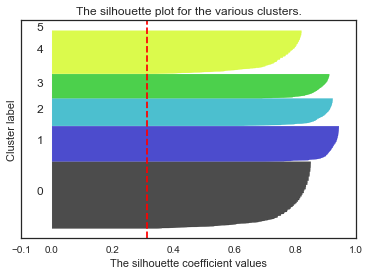

In [346]:
gq1_dbs_silh1 = silhouette_score(train_gq1_new, gq1_dbs1)
print("Silhouette Score: ", gq1_dbs_silh1)
plot_silhouette(train_gq1_new, gq1_dbs1)

Silhouette Score:  0.6694130765022969


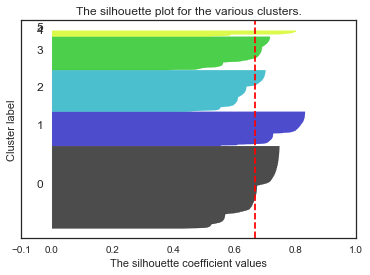

In [348]:
gq1_dbs_silh2 = silhouette_score(train_gq1_new, gq1_dbs2)
print("Silhouette Score: ", gq1_dbs_silh2)
plot_silhouette(train_gq1_new, gq1_dbs2)

In [349]:
print(adjusted_rand_score(gq1_dbs1,gq1_dbs2))

0.2973851906580369


In [362]:
print(adjusted_rand_score(gq1_hier6a,gq1_dbs2))
print(adjusted_rand_score(gq1_hier5s,gq1_dbs2))

print(adjusted_rand_score(gq1_kmeans5,gq1_dbs2))
print(adjusted_rand_score(gq1_kmeans6,gq1_dbs2))

print(adjusted_rand_score(gq1_kmeans5,gq1_hier5w))
print(adjusted_rand_score(gq1_kmeans6,gq1_hier6w))

0.9514458806989434
0.996534004791992
0.996534004791992
0.7735330279283158
1.0
0.9579079933533554


In [364]:
#[0,1,4,5,7,10,12,34,38]are used in clustering
for i in range(40):
    print("1:",i,homogeneity_score(gq1_dbs1,train_gq1_init[i]))
for i in range(40):
    print("2:",i,homogeneity_score(gq1_dbs2,train_gq1_init[i]))

1: 0 0.06517080180669582
1: 1 0.5125225901284056
1: 2 0.3200290462189625
1: 3 0.2940902038817761
1: 4 0.11399363871373251
1: 5 0.018305699563505647
1: 6 0.000136754203049788
1: 7 0.02064235798660397
1: 8 0.31069125739436587
1: 9 0.19685787717096653
1: 10 0.003363366713308678
1: 11 0.0020255279935755296
1: 12 0.2753612246197049
1: 13 0.028480276699624878
1: 14 0.002220893944670873
1: 15 0.07629264894681442
1: 16 0.024797064700831713
1: 17 0.016695628114803716
1: 18 0.0870427056721616
1: 19 0.03943120848814389
1: 20 0.0021544766795720477
1: 21 0.011987359016907085
1: 22 0.062187974372208375
1: 23 0.045305348436280465
1: 24 0.002629991275992246
1: 25 0.0028019570232082082
1: 26 0.003421191246660934
1: 27 0.000982779149679008
1: 28 0.0010707170356218318
1: 29 0.15237151238493638
1: 30 4.1235629020169796e-16
1: 31 0.01379747697107323
1: 32 0.01612905391189629
1: 33 0.01391004479697632
1: 34 0.005391311377870661
1: 35 0.008890293107730112
1: 36 0.0022217206612650782
1: 37 0.00211784805496373

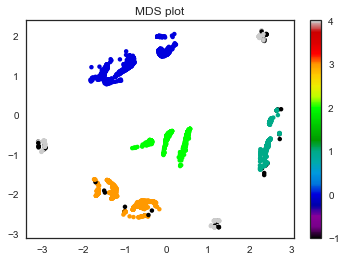

In [395]:
plt.scatter(train_gq1_mds[:, 0], train_gq1_mds[:, 1], s=20, c=gq1_dbs2, cmap = "nipy_spectral", edgecolor = "None")
plt.colorbar()
plt.title("MDS plot")
plt.show()

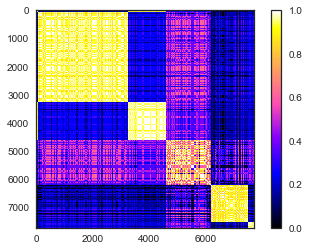

In [396]:
plot_sim_matrix(train_gq1_new, gq1_dbs2)

# GQ2@K-means

In [403]:
train_gq2_new

0       4   12        38  1_4  1_6  1_2  1_1  1_7  1_0  ...   \
7       0.173333  0.7500  0.0  0.576923  0.0  0.0  0.0  0.0  0.0  0.0  ...    
30      0.640000  0.8125  1.0  0.288462  0.0  0.0  0.0  0.0  0.0  0.0  ...    
115     0.320000  0.3750  1.0  1.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...    
125     0.000000  0.0000  1.0  0.115385  0.0  0.0  0.0  0.0  0.0  0.0  ...    
175     0.253333  0.7500  0.0  1.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...    
250     0.066667  0.7500  1.0  0.769231  0.0  0.0  0.0  0.0  0.0  0.0  ...    
391     0.120000  0.4375  1.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...    
392     0.493333  0.0000  1.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...    
404     0.026667  0.0625  1.0  0.153846  0.0  0.0  0.0  0.0  0.0  0.0  ...    
418     0.200000  0.5625  0.0  0.884615  0.0  0.0  0.0  0.0  0.0  0.0  ...    
445     0.053333  0.3125  1.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...    
454     0.346667  1.0000  0.0  0.846154  0.0  0.0  0.0  0.0  0.0  0.0  ...    
496     0.066667  0.0625  1.0  0.769231  0.0  0.0  0.0  0.0  0.0  0.0  ...    
568     0.240000  0.8750  0.0  0.442308  0.0  0.0  0.0  0.0  0.0  0.0  ...    
578     0.400000  0.3125  0.0  0.192308  0.0  0.0  0.0  0.0  0.0  0.0  ...    
587     0.600000  0.7500  0.0  0.865385  0.0  0.0  0.0  0.0  0.0  0.0  ...    
625     0.360000  0.7500  1.0  1.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...    
687     0.026667  0.0000  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...    
692     0.466667  1.0000  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...    
844     0.293333  0.7500  0.0  1.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...    
854     0.240000  0.1250  1.0  0.019231  0.0  0.0  0.0  0.0  0.0  0.0  ...    
864     0.546667  0.5625  0.0  0.807692  0.0  0.0  0.0  0.0  0.0  0.0  ...    
866     0.013333  0.0000  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...    
895     0.093333  0.7500  1.0  0.500000  0.0  0.0  0.0  0.0  0.0  0.0  ...    
902     0.293333  1.0000  0.0  0.403846  0.0  0.0  0.0  0.0  0.0  0.0  ...    
947     0.240000  0.7500  0.0  0.173077  0.0  0.0  0.0  0.0  0.0  0.0  ...    
967     0.266667  0.7500  0.0  0.673077  0.0  0.0  0.0  0.0  0.0  0.0  ...    
1005    0.546667  0.7500  0.0  1.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...    
1011    0.200000  0.7500  1.0  0.576923  0.0  0.0  0.0  0.0  0.0  0.0  ...    
1017    0.480000  0.7500  0.0  0.442308  0.0  0.0  0.0  0.0  0.0  0.0  ...    
...          ...     ...  ...       ...  ...  ...  ...  ...  ...  ...  ...    
198454  0.093333  0.7500  0.0  1.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...    
198538  0.093333  1.0000  1.0  0.173077  0.0  0.0  0.0  0.0  0.0  0.0  ...    
198548  0.013333  0.3750  1.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...    
198613  0.040000  0.3125  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...    
198619  0.506667  0.2500  1.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...    
198641  0.320000  1.0000  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...    
198668  0.146667  1.0000  0.0  0.000000  1.0  1.0  1.0  1.0  1.0  1.0  ...    
198681  0.040000  0.0000  1.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...    
198711  0.293333  0.3750  1.0  1.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...    
198738  0.160000  0.0625  1.0  1.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...    
198745  0.133333  0.7500  1.0  0.692308  0.0  0.0  0.0  0.0  0.0  0.0  ...    
198762  0.493333  1.0000  0.0  1.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...    
198819  0.533333  0.5000  1.0  0.500000  0.0  0.0  0.0  0.0  0.0  0.0  ...    
198863  0.040000  0.0625  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...    
198866  0.386667  0.7500  1.0  0.500000  0.0  0.0  0.0  0.0  0.0  0.0  ...    
198949  0.426667  0.7500  1.0  0.961538  0.0  0.0  0.0  0.0  0.0  0.0  ...    
198961  0.173333  0.7500  0.0  0.115385  0.0  0.0  0.0  0.0  0.0  0.0  ...    
199038  0.200000  0.7500  0.0  0.980769  0.0  0.0  0.0  0.0  0.0  0.0  ...    
199063  0.013333  0.3125  1.0  0.000000  0.0  0.0  0.0  0.0  0.0 

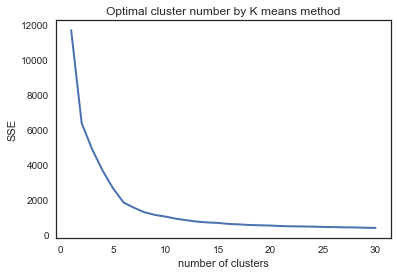

array([11669.8030031 ,  6372.00630417,  4874.97022143,  3655.23607577,
        2639.35015935,  1837.61936999,  1535.89948906,  1278.23432934,
        1129.55304661,  1034.94577187,   915.21490702,   826.75062908,
         748.67345308,   701.53742181,   675.51224028,   616.18770337,
         591.72157339,   556.13018213,   540.17852797,   524.08271088,
         496.38873228,   480.66653035,   474.24819765,   462.32260934,
         446.50285454,   435.89554349,   423.54457266,   416.44811407,
         398.73493071,   389.74335534])

In [404]:
selectK(train_gq2_new)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


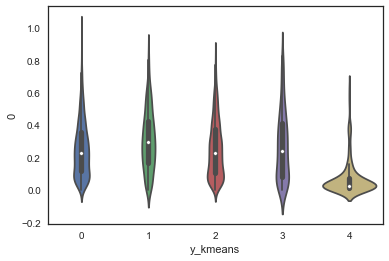

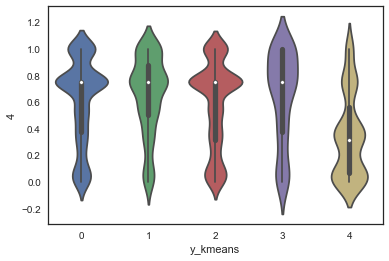

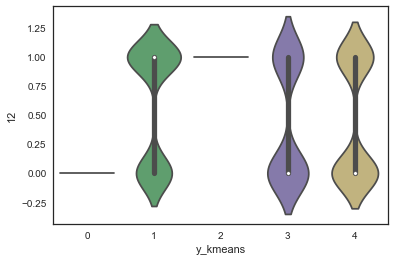

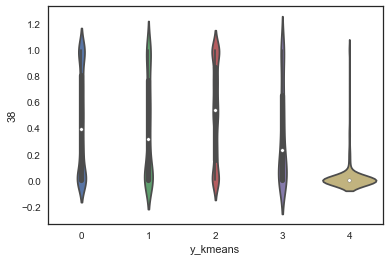

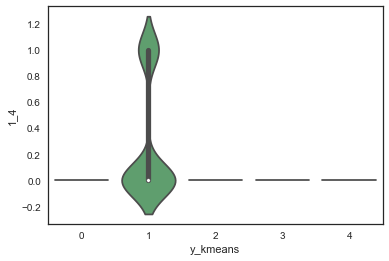

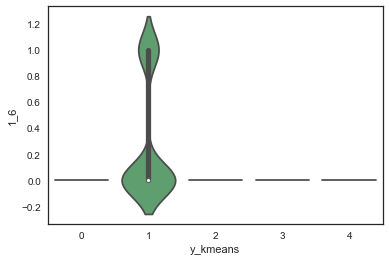

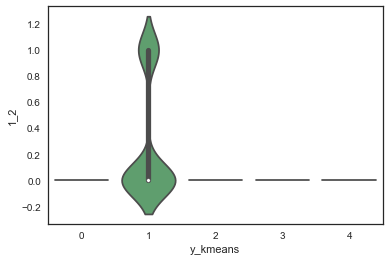

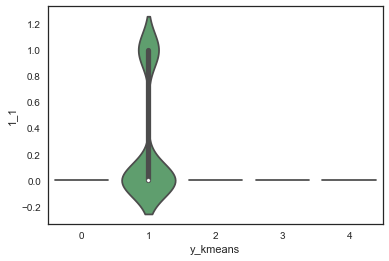

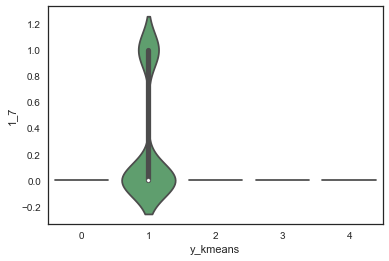

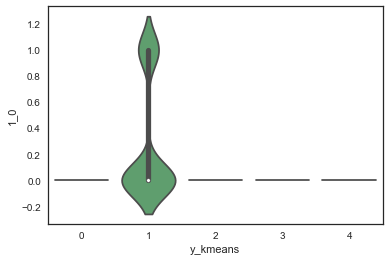

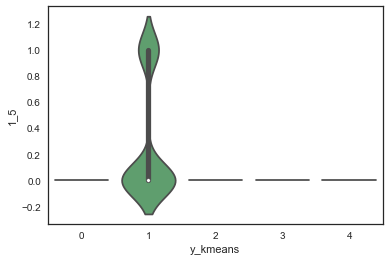

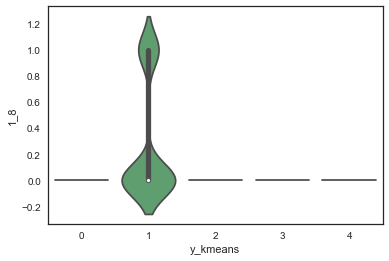

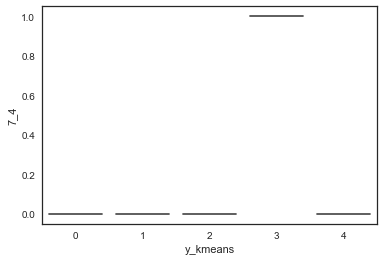

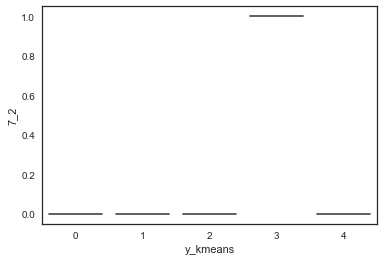

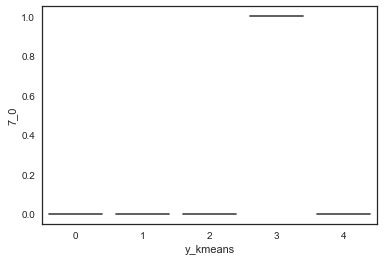

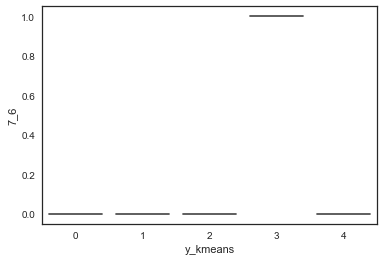

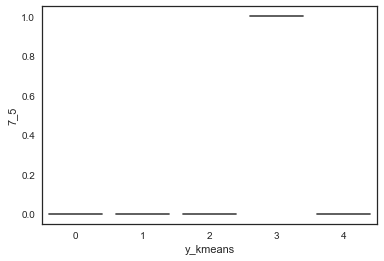

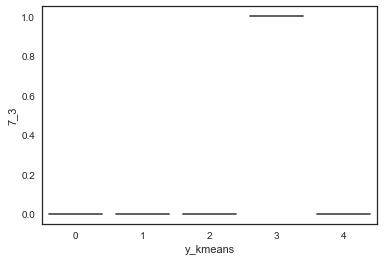

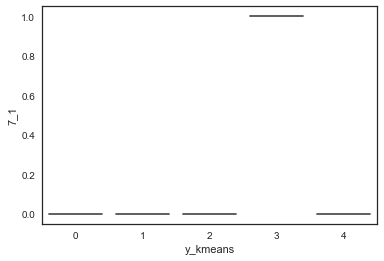

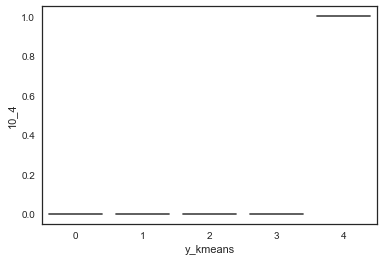

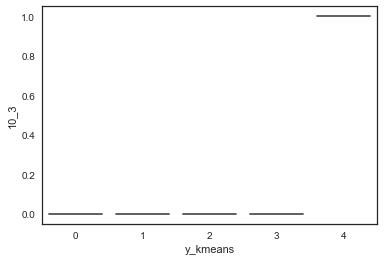

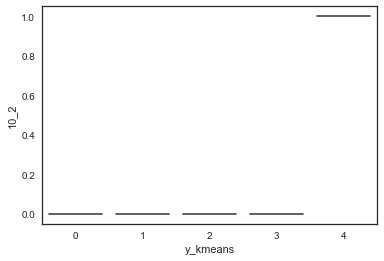

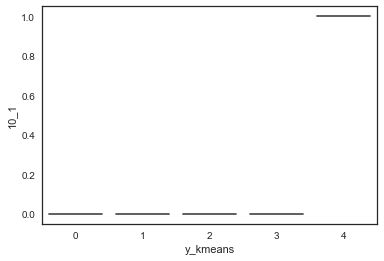

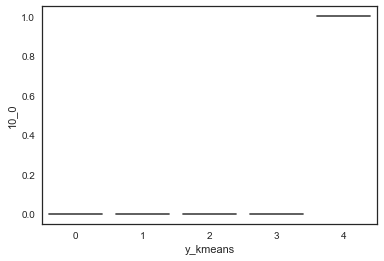

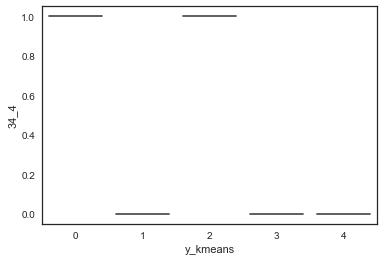

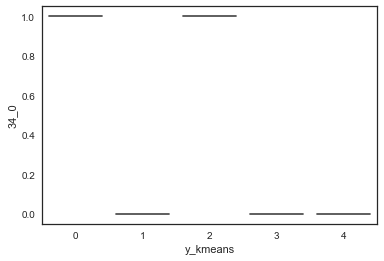

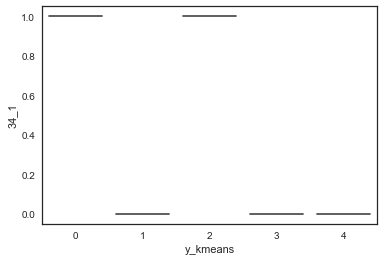

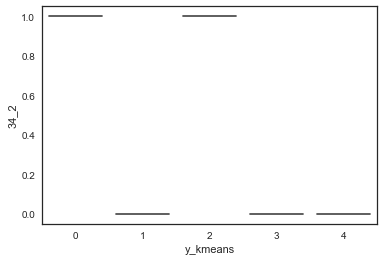

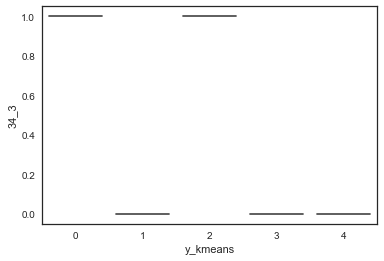

SSE:  2639.3501593483134
# iter:  2
% instances per cluster:  [0.35296075 0.08349967 0.46972721 0.03010645 0.06370592]


In [405]:
gq2_kmeans5 = useKmeans(train_gq2_new,5)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


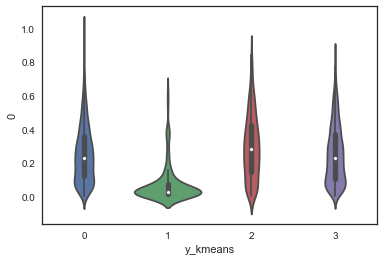

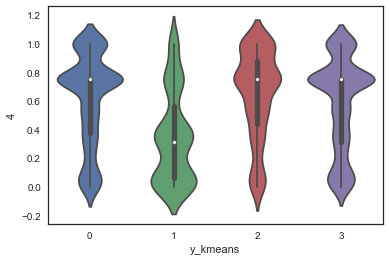

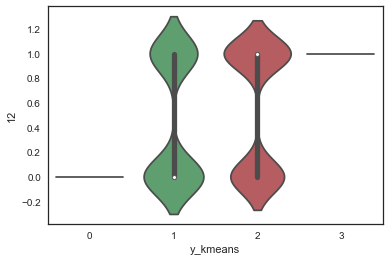

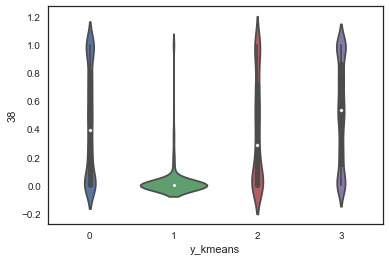

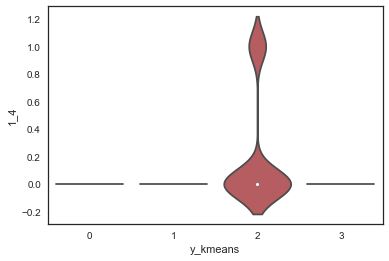

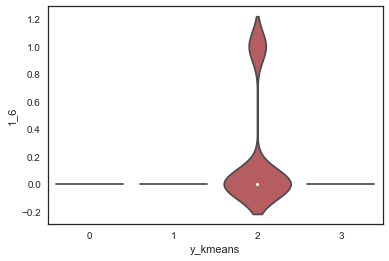

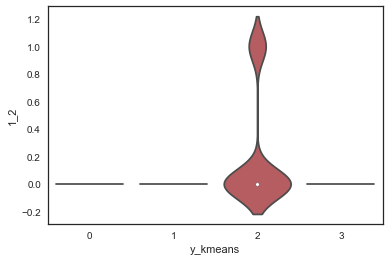

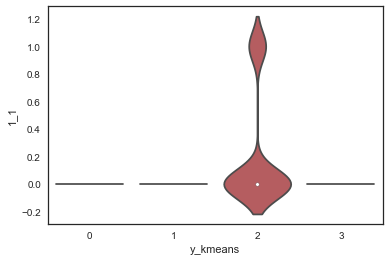

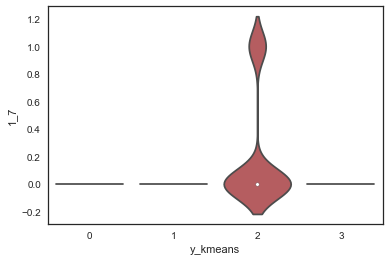

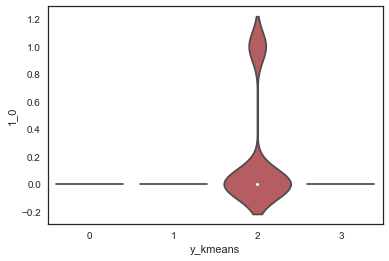

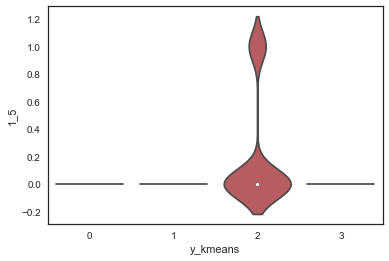

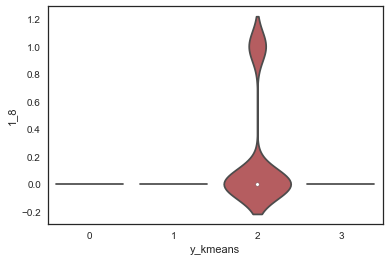

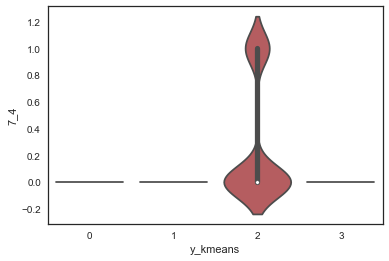

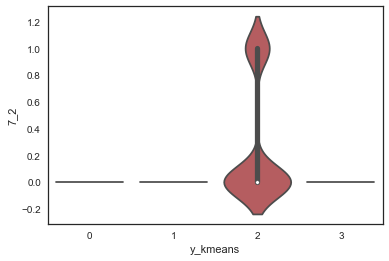

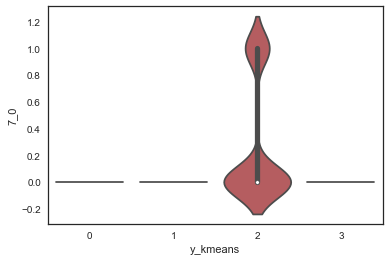

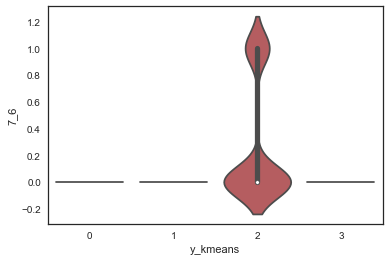

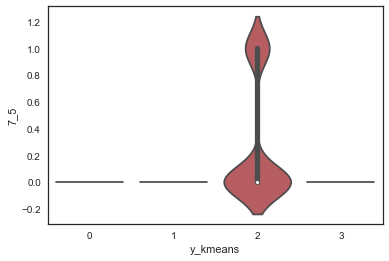

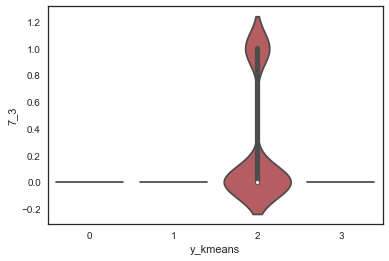

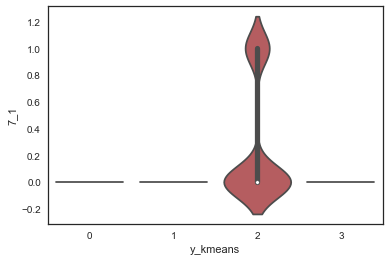

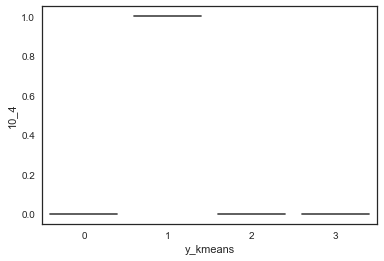

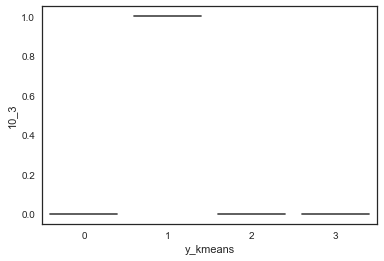

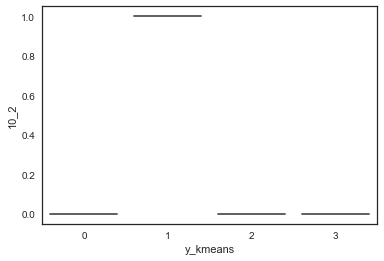

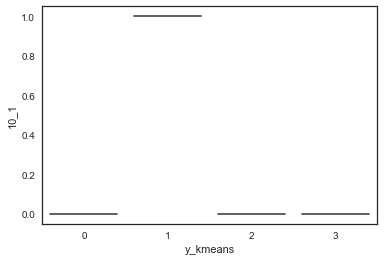

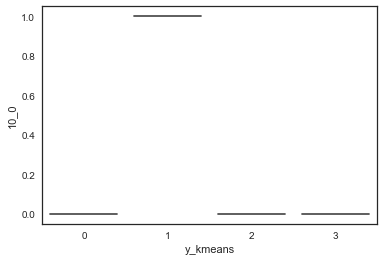

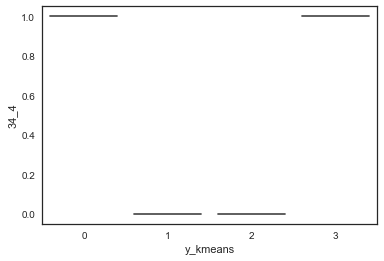

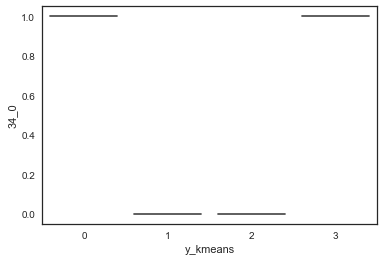

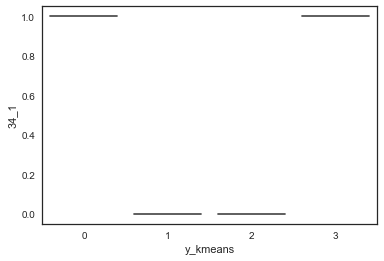

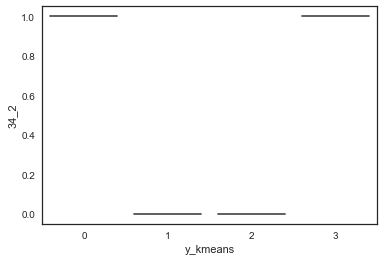

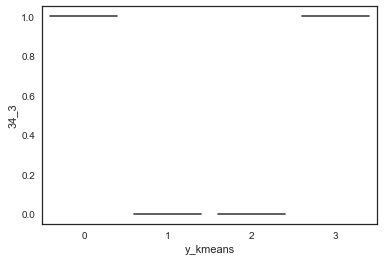

SSE:  3655.2360757699785
# iter:  9
% instances per cluster:  [0.35296075 0.06370592 0.11360612 0.46972721]


In [406]:
gq2_kmeans4 = useKmeans(train_gq2_new,4)

Silhouette Score:  0.4716450347191418


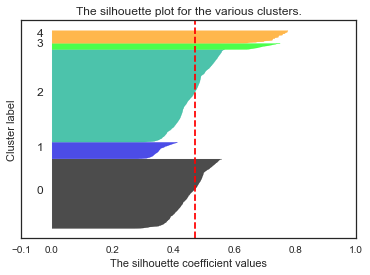

In [407]:
gq2_kmeans_silh5 = silhouette_score(train_gq2_new, gq2_kmeans5)
print("Silhouette Score: ", gq2_kmeans_silh5)
plot_silhouette(train_gq2_new, gq2_kmeans5)

Silhouette Score:  0.4483980107128964


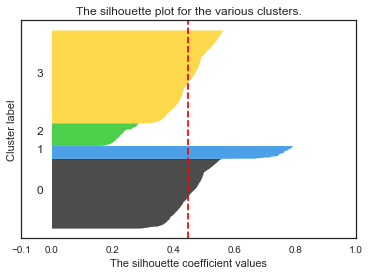

In [408]:
gq2_kmeans_silh4 = silhouette_score(train_gq2_new, gq2_kmeans4)
print("Silhouette Score: ", gq2_kmeans_silh4)
plot_silhouette(train_gq2_new, gq2_kmeans4)

In [409]:
adjusted_rand_score(gq2_kmeans4,gq2_kmeans5)

0.9890818286510524

In [411]:
for i in range(40):
    print(i,homogeneity_score(gq2_kmeans5,train_gq2_init[i]))
for i in range(40):
    print(i,homogeneity_score(gq2_kmeans4,train_gq2_init[i]))

0 0.07886060195255389
1 0.5358636486025232
2 0.3877366801830915
3 0.38414014349876524
4 0.03770653044845909
5 6.648323611219137e-16
6 0.027556846471991726
7 0.034401631295869685
8 0.3726910835147122
9 0.3272942806859561
10 0.005940405602052093
11 0.004999490286513201
12 0.4667805593929892
13 6.648323611219137e-16
14 0.21715828049813618
15 0.011114272907743746
16 0.012781644722115506
17 0.010586348277806993
18 0.025640725061650313
19 0.07542237321748302
20 0.00347596297657918
21 0.015538020595041687
22 0.09767446506865735
23 0.07773065145964062
24 0.0043352917349506635
25 0.0049203170469318235
26 0.005365127087517277
27 0.0011351850451207656
28 0.0014177042903786635
29 0.0744957499941983
30 0.03747185216027413
31 0.01476726879187751
32 0.01467205070347052
33 0.014167298925217117
34 0.0032774905294370273
35 0.012644792070243802
36 0.0016854729187094956
37 0.00165797151441957
38 0.07810970552381077
39 8.885932442214301e-05
0 0.07749523247083967
1 0.5092356245678474
2 0.3960123163859013
3 

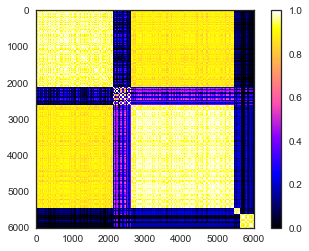

In [413]:
def plot_sim_matrix2(X, labels):
    t = labels.reshape(6012, -1)
    X_with_label = np.concatenate((X, t), axis=1)
    X_label_sorted = X_with_label[X_with_label[:, -1].argsort()]
    X_sorted = np.delete(X_label_sorted, -1, 1)
    X_act_sim = cosine_similarity(X_sorted)
    plt.imshow(X_act_sim, cmap=plt.cm.gnuplot2, interpolation='nearest')
    plt.colorbar()
    plt.show()
plot_sim_matrix2(train_gq2_new, gq2_kmeans5)

In [498]:
mds2 = MDS(n_components=2)
train_gq2_mds = mds2.fit_transform(train_gq2_new)

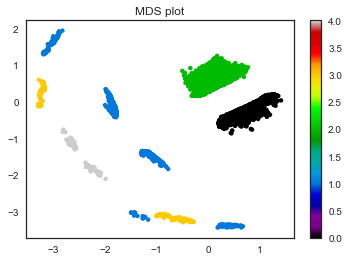

In [499]:
plt.scatter(train_gq2_mds[:, 0], train_gq2_mds[:, 1], s=20, c=gq2_kmeans5, cmap = "nipy_spectral", edgecolor = "None")
plt.colorbar()
plt.title("MDS plot")
plt.show()

# GQ2@Hierarchical

Time taken:  10.35315
% instances per cluster:  [0.08349967 0.46972721 0.06370592 0.35296075 0.03010645]


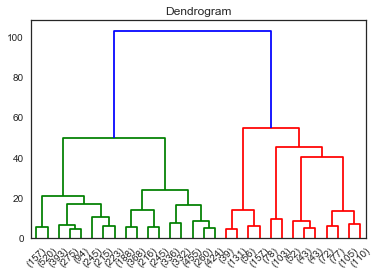

Time taken:  5.6325
% instances per cluster:  [0.11360612 0.46972721 0.06370592 0.35296075]


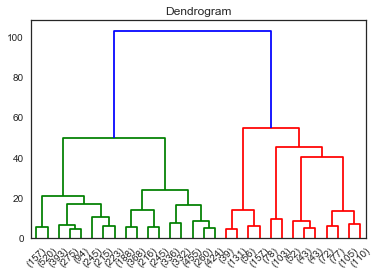

In [414]:
gq2_hier5w = useHierarchical(train_gq2_new,'ward',5)
gq2_hier4w = useHierarchical(train_gq2_new,'ward',4)

Time taken:  8.69608
% instances per cluster:  [0.82268796 0.06054558 0.03010645 0.02295409 0.06370592]


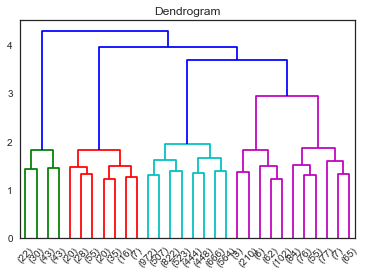

Time taken:  8.181090000000001
% instances per cluster:  [0.1242515  0.82268796 0.03010645 0.02295409]


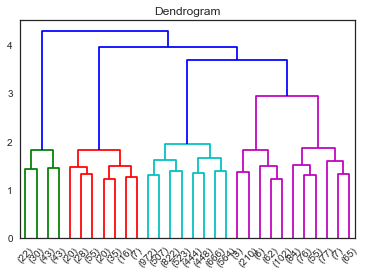

In [415]:
gq2_hier5c = useHierarchical(train_gq2_new,'complete',5)
gq2_hier4c = useHierarchical(train_gq2_new,'complete',4)

Time taken:  9.589780000000001
% instances per cluster:  [0.06370592 0.82268796 0.03010645 0.02295409 0.06054558]


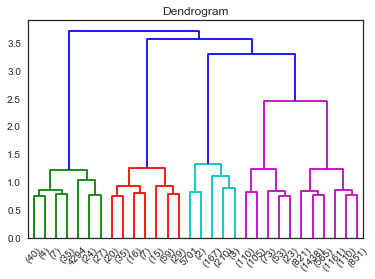

Time taken:  3.44198
% instances per cluster:  [0.88323353 0.06370592 0.03010645 0.02295409]


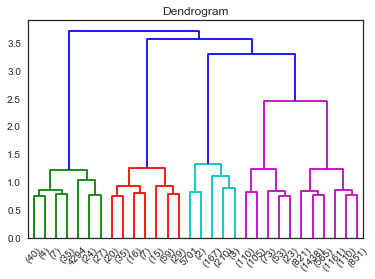

In [416]:
gq2_hier5a = useHierarchical(train_gq2_new,'average',5)
gq2_hier4a = useHierarchical(train_gq2_new,'average',4)

Time taken:  7.56061
% instances per cluster:  [0.02295409 0.06370592 0.03010645 0.06054558 0.82268796]


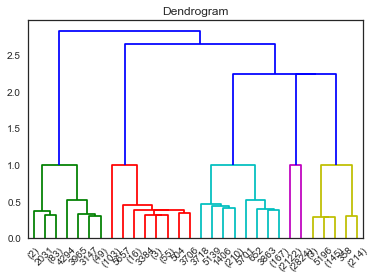

Time taken:  10.72241
% instances per cluster:  [0.88323353 0.02295409 0.03010645 0.06370592]


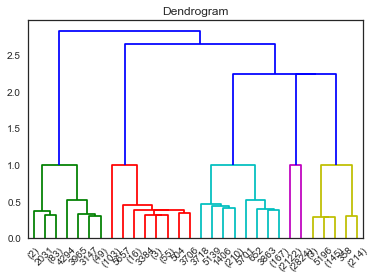

In [417]:
gq2_hier5s = useHierarchical(train_gq2_new,'single',5)
gq2_hier4s = useHierarchical(train_gq2_new,'single',4)

Silhouette Score:  0.4716450347191418


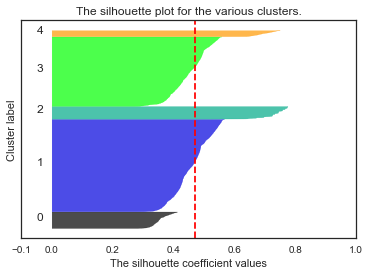

In [418]:
gq2_hier_silh5w = silhouette_score(train_gq2_new, gq2_hier5w)
print("Silhouette Score: ", gq2_hier_silh5w)
plot_silhouette(train_gq2_new, gq2_hier5w)

Silhouette Score:  0.4483980107128964


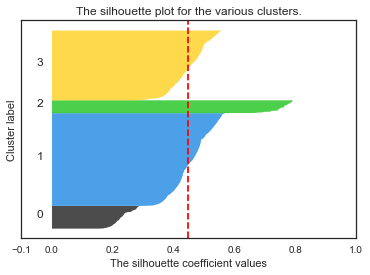

In [419]:
gq2_hier_silh4w = silhouette_score(train_gq2_new, gq2_hier4w)
print("Silhouette Score: ", gq2_hier_silh4w)
plot_silhouette(train_gq2_new, gq2_hier4w)

Silhouette Score:  0.6218652849871065


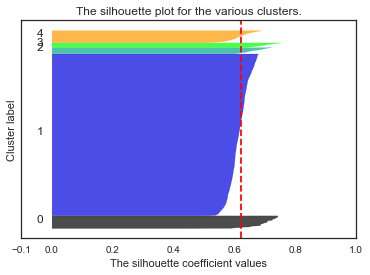

In [420]:
gq2_hier_silh5a = silhouette_score(train_gq2_new, gq2_hier5a)
print("Silhouette Score: ", gq2_hier_silh5a)
plot_silhouette(train_gq2_new, gq2_hier5a)

Silhouette Score:  0.6551462355778772


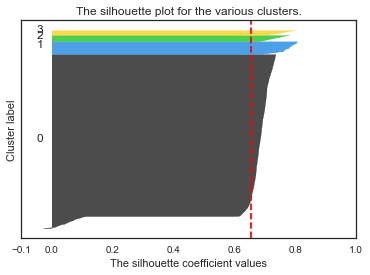

In [421]:
gq2_hier_silh4a = silhouette_score(train_gq2_new, gq2_hier4a)
print("Silhouette Score: ", gq2_hier_silh4a)
plot_silhouette(train_gq2_new, gq2_hier4a)

Silhouette Score:  0.6218652849871065


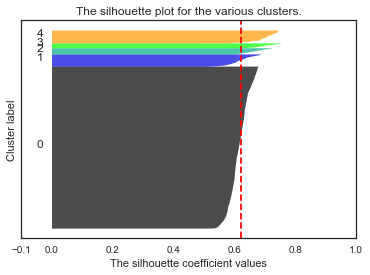

In [422]:
gq2_hier_silh5c = silhouette_score(train_gq2_new, gq2_hier5c)
print("Silhouette Score: ", gq2_hier_silh5c)
plot_silhouette(train_gq2_new, gq2_hier5c)

Silhouette Score:  0.643524992028992


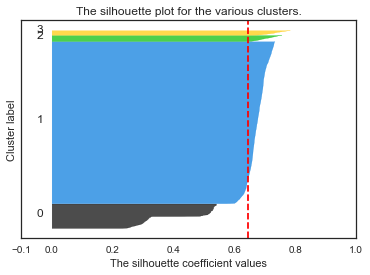

In [423]:
gq2_hier_silh4c = silhouette_score(train_gq2_new, gq2_hier4c)
print("Silhouette Score: ", gq2_hier_silh4c)
plot_silhouette(train_gq2_new, gq2_hier4c)

Silhouette Score:  0.6218652849871065


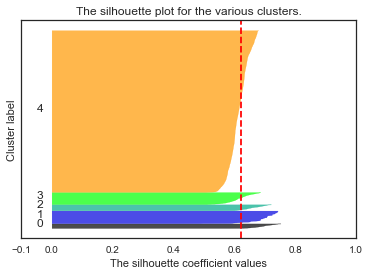

In [424]:
gq2_hier_silh5s = silhouette_score(train_gq2_new, gq2_hier5s)
print("Silhouette Score: ", gq2_hier_silh5s)
plot_silhouette(train_gq2_new, gq2_hier5s)

Silhouette Score:  0.6551462355778772


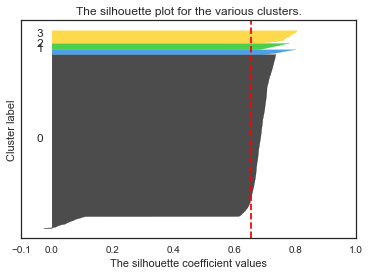

In [425]:
gq2_hier_silh4s = silhouette_score(train_gq2_new, gq2_hier4s)
print("Silhouette Score: ", gq2_hier_silh4s)
plot_silhouette(train_gq2_new, gq2_hier4s)

In [426]:
print(adjusted_rand_score(gq2_hier4s,gq2_hier4c))
print(adjusted_rand_score(gq2_hier4s,gq2_hier4a))
print(adjusted_rand_score(gq2_hier4s,gq2_hier4w))
print(adjusted_rand_score(gq2_hier4c,gq2_hier4a))
print(adjusted_rand_score(gq2_hier4c,gq2_hier4w))
print(adjusted_rand_score(gq2_hier4a,gq2_hier4w))

0.724321617816323
1.0
0.24133240973612038
0.724321617816323
0.37267299779122537
0.24133240973612038


In [429]:
print(adjusted_rand_score(gq2_hier5s,gq2_hier5c))
print(adjusted_rand_score(gq2_hier5s,gq2_hier5a))
print(adjusted_rand_score(gq2_hier5s,gq2_hier5w))
print(adjusted_rand_score(gq2_hier5c,gq2_hier5a))
print(adjusted_rand_score(gq2_hier5c,gq2_hier5w))
print(adjusted_rand_score(gq2_hier5a,gq2_hier5w))

1.0
1.0
0.3954190270310096
1.0
0.3954190270310096
0.3954190270310096


In [427]:
print(adjusted_rand_score(gq2_hier5s,gq2_hier4s))
print(adjusted_rand_score(gq2_hier5c,gq2_hier4c))
print(adjusted_rand_score(gq2_hier5a,gq2_hier4a))
print(adjusted_rand_score(gq2_hier5w,gq2_hier4w))

0.7469977540025251
0.9819730316185021
0.7469977540025251
0.9890818286510524


In [428]:
#[0,1,4,5,7,10,12,34,38]are used in clustering
for i in range(40):
    print("s:",i,homogeneity_score(gq2_hier5s,train_gq2_init[i]))
for i in range(40):
    print("c:",i,homogeneity_score(gq2_hier5c,train_gq2_init[i]))
for i in range(40):
    print("a:",i,homogeneity_score(gq2_hier5a,train_gq2_init[i]))
for i in range(40):
    print("w:",i,homogeneity_score(gq2_hier5w,train_gq2_init[i]))

s: 0 0.13757331103419318
s: 1 1.0000000000000002
s: 2 0.5602174112248814
s: 3 0.4777775555201675
s: 4 0.06527904522652667
s: 5 0.0
s: 6 0.047074435874173204
s: 7 0.04422970103631647
s: 8 0.5489105254757671
s: 9 0.4207538417567231
s: 10 0.008439858513707448
s: 11 0.008682039928391828
s: 12 0.004640068202615803
s: 13 0.0
s: 14 0.3514754698864388
s: 15 0.01443118515512725
s: 16 0.012879201305880387
s: 17 0.010646752318128989
s: 18 0.027808585014057016
s: 19 0.10066004837299533
s: 20 0.006316552214729631
s: 21 0.024712675119210936
s: 22 0.09138222673435768
s: 23 0.07483421948698084
s: 24 0.007103748881217793
s: 25 0.009093104917966718
s: 26 0.010599280618097803
s: 27 0.0014874203140039278
s: 28 0.0015525964123042784
s: 29 0.1290795279725904
s: 30 0.06483858549778411
s: 31 0.024616525888673448
s: 32 0.024709449038318794
s: 33 0.022715191122257727
s: 34 0.006241451678221184
s: 35 0.020295712615864648
s: 36 0.0036838697974514232
s: 37 0.0035959872705222115
s: 38 0.12426762828760918
s: 39 0.00

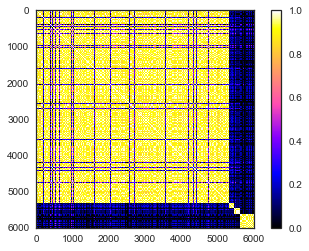

In [431]:
plot_sim_matrix2(train_gq2_new, gq2_hier4s)

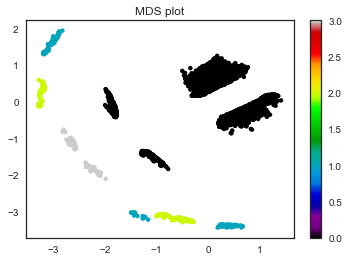

In [500]:
plt.scatter(train_gq2_mds[:, 0], train_gq2_mds[:, 1], s=20, c=gq2_hier4s, cmap = "nipy_spectral", edgecolor = "None")
plt.colorbar()
plt.title("MDS plot")
plt.show()

# GQ2@DBSCAN

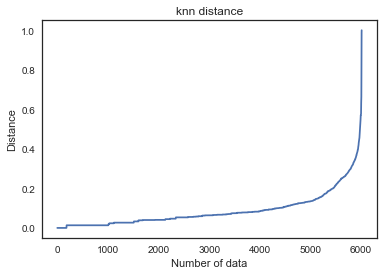

In [432]:
plot_knn_distance(train_gq2_new,k=10)

In [441]:
gq2_dbs1 = useDBSCAN(train_gq2_new,0.4,100)

Time taken:  2.6019
% instances per cluster:  [0.35296075 0.46972721 0.02461743 0.03210246]
% of noise:  0.1205921490352628


In [442]:
gq2_dbs2 = useDBSCAN(train_gq2_new,0.5,100)

Time taken:  7.65001
% instances per cluster:  [0.35296075 0.46972721 0.02761144 0.03526281 0.02644711]
% of noise:  0.08799068529607451


Silhouette Score:  0.43267120771421275


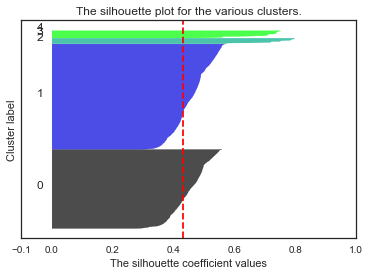

In [444]:
gq2_dbs_silh1 = silhouette_score(train_gq2_new, gq2_dbs1)
print("Silhouette Score: ", gq2_dbs_silh1)
plot_silhouette(train_gq2_new, gq2_dbs1)

Silhouette Score:  0.4222746062406766


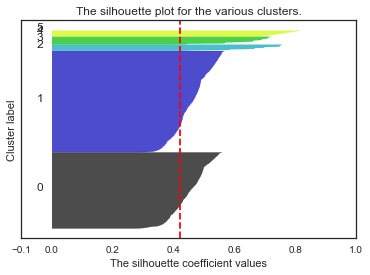

In [445]:
gq2_dbs_silh2 = silhouette_score(train_gq2_new, gq2_dbs2)
print("Silhouette Score: ", gq2_dbs_silh2)
plot_silhouette(train_gq2_new, gq2_dbs2)

In [446]:
print(adjusted_rand_score(gq2_dbs1,gq2_dbs2))

0.9860129818532121


In [447]:
print(adjusted_rand_score(gq2_hier4a,gq2_dbs2))
print(adjusted_rand_score(gq2_hier5s,gq2_dbs2))

print(adjusted_rand_score(gq2_kmeans5,gq2_dbs2))
print(adjusted_rand_score(gq2_kmeans4,gq2_dbs2))

print(adjusted_rand_score(gq2_kmeans5,gq2_hier5s))
print(adjusted_rand_score(gq2_kmeans4,gq2_hier4s))

0.2441310357593456
0.3847855995420158
0.981139706111612
0.9852046960296584
0.3954190270310096
0.24133240973612038


In [448]:
for i in range(40):
    print("1:",i,homogeneity_score(gq2_dbs1,train_gq2_init[i]))
for i in range(40):
    print("2:",i,homogeneity_score(gq2_dbs2,train_gq2_init[i]))

1: 0 0.07849383950241505
1: 1 0.47185355639602794
1: 2 0.3619112465516807
1: 3 0.3606664682697848
1: 4 0.04675824203754739
1: 5 8.002939483864023e-16
1: 6 0.029528069832752184
1: 7 0.03525500134246909
1: 8 0.3491495559385633
1: 9 0.30852086982560417
1: 10 0.0056020773042774474
1: 11 0.005174059717808363
1: 12 0.5111769640026167
1: 13 8.002939483864023e-16
1: 14 0.19941159133243808
1: 15 0.01173138532005734
1: 16 0.011416492342242408
1: 17 0.009347287379457935
1: 18 0.02359608849389019
1: 19 0.07658793823475896
1: 20 0.00318142783829176
1: 21 0.01473237088723167
1: 22 0.10314087870799753
1: 23 0.08055694024052121
1: 24 0.003812310510729453
1: 25 0.0037928098440150387
1: 26 0.004136552116013249
1: 27 0.0009881342822458765
1: 28 0.0014136368147933428
1: 29 0.06882928453401009
1: 30 0.040358331909146374
1: 31 0.015304603146826355
1: 32 0.014215520149627184
1: 33 0.014385145561427526
1: 34 0.0020472609603836255
1: 35 0.012498224314281294
1: 36 0.0011548890745277777
1: 37 0.00112665254397910

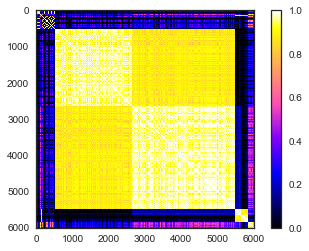

In [450]:
plot_sim_matrix2(train_gq2_new, gq2_dbs2)

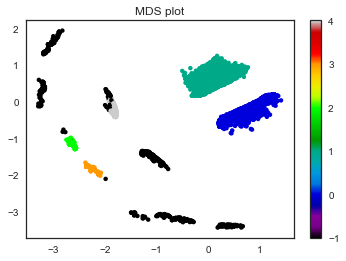

In [501]:
plt.scatter(train_gq2_mds[:, 0], train_gq2_mds[:, 1], s=20, c=gq2_dbs2, cmap = "nipy_spectral", edgecolor = "None")
plt.colorbar()
plt.title("MDS plot")
plt.show()

# GQ3@K-means

In [455]:
train_gq3_new

0       4   12        38  1_5  1_4  1_6  1_3  1_7  1_1  ...   \
57      0.351351  1.0000  1.0  1.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...    
64      0.418919  0.1250  1.0  1.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...    
68      0.229730  0.5000  1.0  1.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...    
80      0.567568  0.9375  0.0  1.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...    
88      0.513514  0.7500  1.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...    
122     0.391892  0.9375  0.0  1.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...    
153     0.337838  1.0000  1.0  1.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...    
183     0.256757  0.5625  1.0  1.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...    
190     0.270270  0.9375  0.0  1.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...    
213     0.243243  0.7500  1.0  1.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...    
268     0.432432  0.5625  1.0  1.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...    
296     0.567568  0.8750  0.0  1.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...    
326     0.675676  0.5625  1.0  1.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...    
367     0.513514  0.5625  1.0  1.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...    
369     0.202703  0.5625  0.0  1.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...    
387     0.513514  0.7500  1.0  1.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...    
400     0.513514  0.5625  0.0  0.769231  0.0  0.0  0.0  0.0  0.0  0.0  ...    
410     0.527027  1.0000  0.0  1.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...    
411     0.945946  0.8750  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...    
456     0.324324  0.9375  1.0  1.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...    
476     0.581081  1.0000  1.0  1.000000  1.0  1.0  1.0  1.0  1.0  1.0  ...    
480     0.229730  0.8750  1.0  1.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...    
492     0.216216  0.5625  0.0  1.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...    
500     0.540541  0.8750  1.0  1.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...    
534     0.270270  0.7500  0.0  0.980769  0.0  0.0  0.0  0.0  0.0  0.0  ...    
539     0.459459  1.0000  1.0  1.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...    
562     0.445946  0.5625  1.0  1.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...    
569     0.527027  0.8750  1.0  1.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...    
570     0.243243  1.0000  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...    
589     0.500000  0.1875  1.0  1.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...    
...          ...     ...  ...       ...  ...  ...  ...  ...  ...  ...  ...    
199035  0.175676  0.5625  0.0  1.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...    
199036  0.554054  0.5625  1.0  0.980769  0.0  0.0  0.0  0.0  0.0  0.0  ...    
199055  0.675676  1.0000  1.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...    
199091  0.162162  0.5625  1.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...    
199094  0.432432  0.7500  1.0  1.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...    
199102  0.283784  0.8750  1.0  1.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...    
199114  0.189189  0.5625  1.0  1.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...    
199152  0.459459  1.0000  0.0  1.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...    
199158  0.297297  0.7500  1.0  1.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...    
199184  0.391892  0.5625  1.0  1.000000  1.0  1.0  1.0  1.0  1.0  1.0  ...    
199200  0.540541  0.7500  1.0  1.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...    
199219  0.445946  0.8750  1.0  1.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...    
199221  0.500000  0.5625  0.0  1.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...    
199226  0.270270  0.5625  1.0  1.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...    
199231  0.162162  0.5625  1.0  1.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...    
199241  0.189189  0.5625  1.0  1.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...    
199256  0.418919  0.8750  0.0  1.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...    
199260  0.445946  0.4375  1.0  1.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...    
199264  0.527027  0.6875  1.0  1.000000  0.0  0.0  0.0  0.0  0.0 

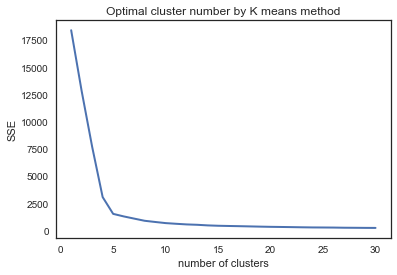

array([18388.14093191, 12801.27236817,  7683.74026051,  3067.19716987,
        1526.20488906,  1293.51422114,  1091.20649883,   891.67201037,
         782.13872732,   678.17600071,   615.11013314,   557.34744705,
         523.31236194,   468.29230285,   434.0757634 ,   413.94694718,
         395.83241988,   375.17976525,   353.62703345,   335.42915769,
         322.99641504,   308.76740783,   292.87864251,   279.80769231,
         274.38253387,   267.73835412,   253.271822  ,   247.37912898,
         239.69418111,   235.91670138])

In [456]:
selectK(train_gq3_new)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


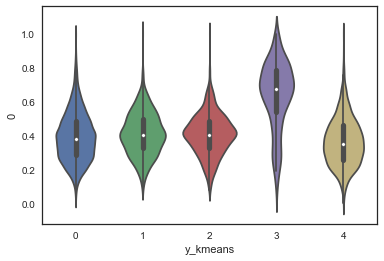

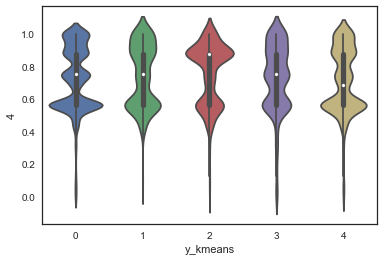

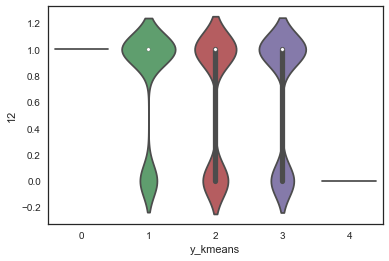

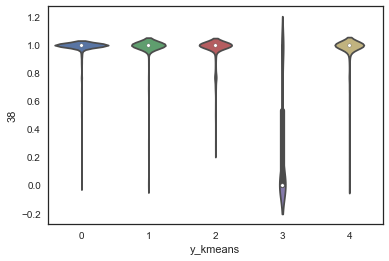

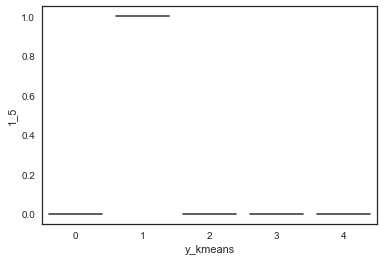

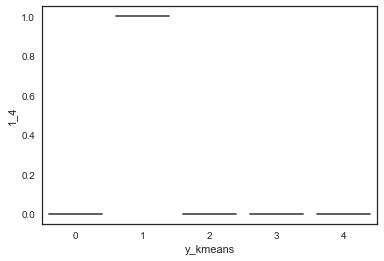

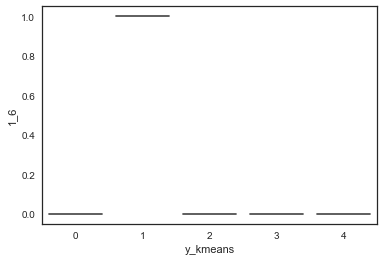

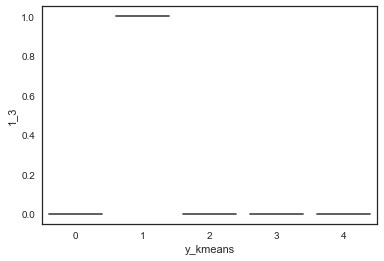

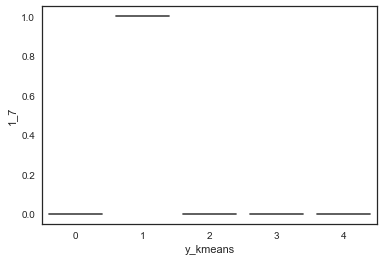

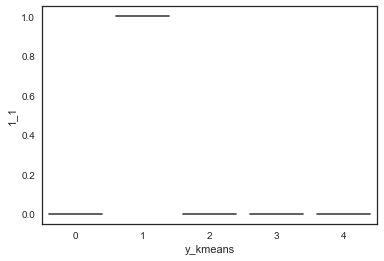

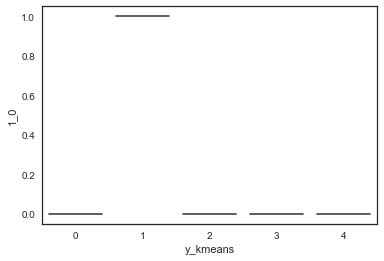

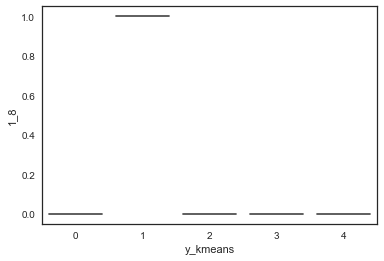

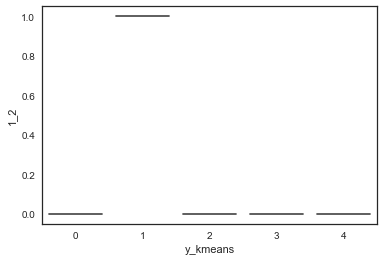

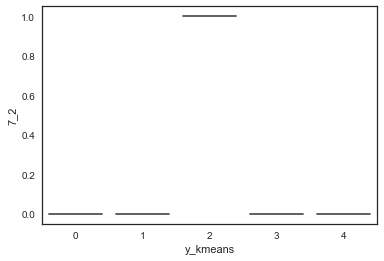

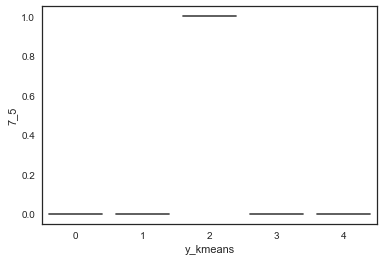

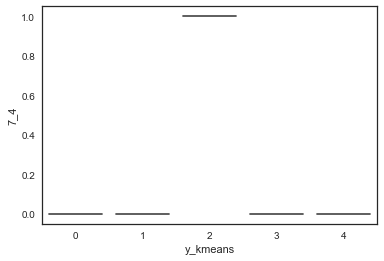

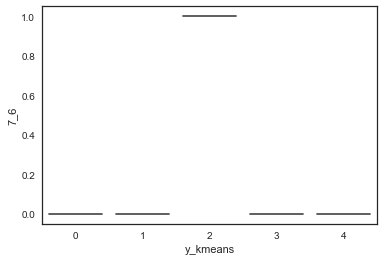

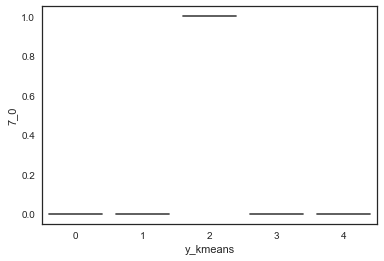

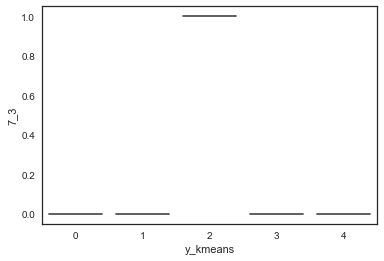

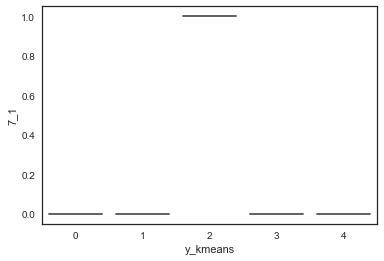

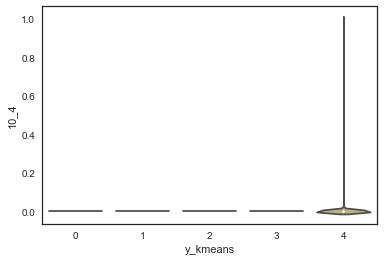

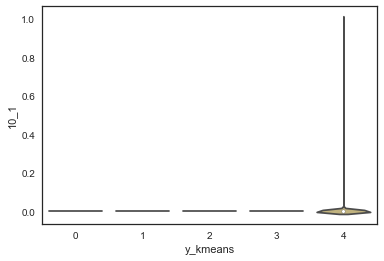

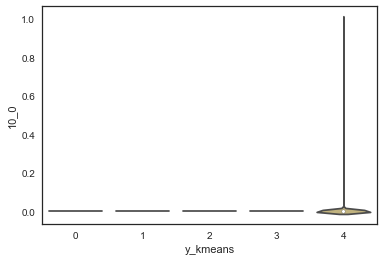

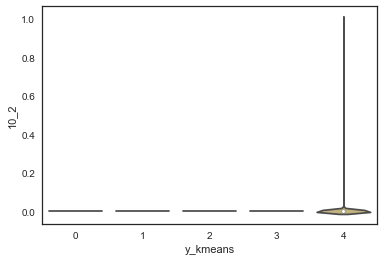

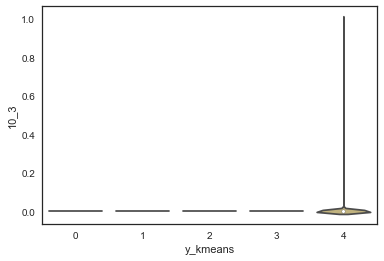

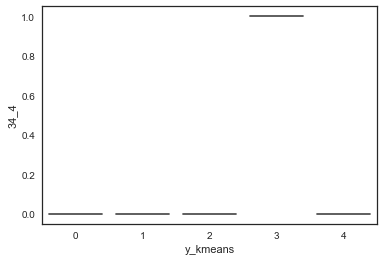

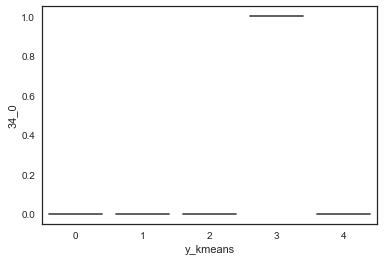

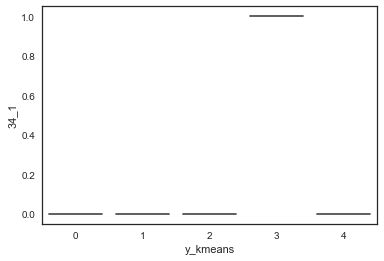

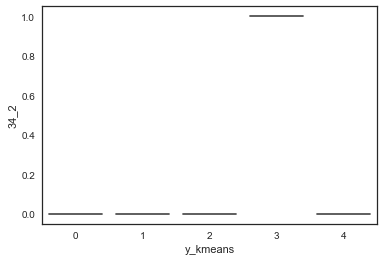

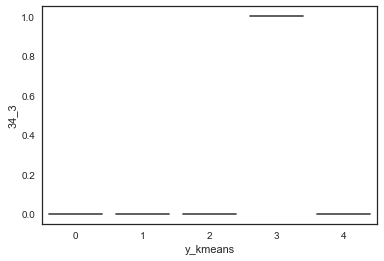

SSE:  1526.2048890609458
# iter:  2
% instances per cluster:  [0.65699038 0.04827363 0.06840786 0.07277432 0.15355381]


In [457]:
gq3_kmeans5 = useKmeans(train_gq3_new,5)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


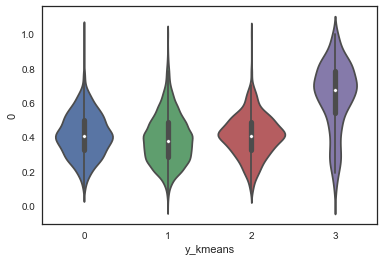

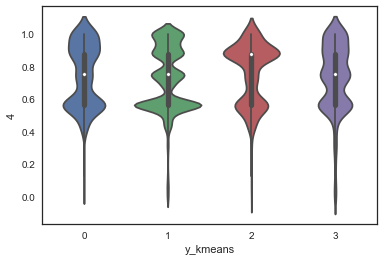

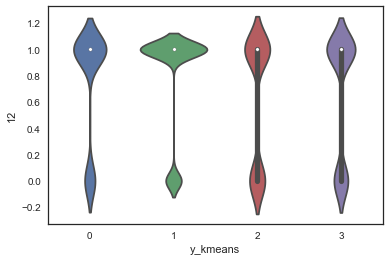

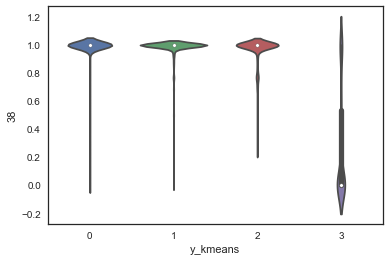

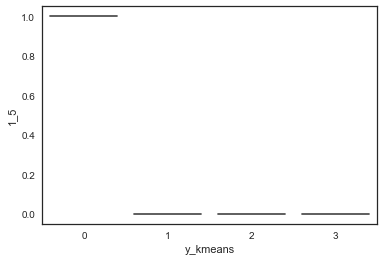

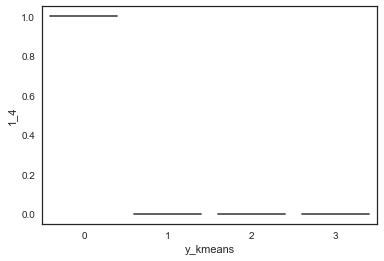

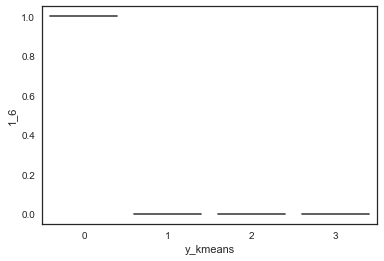

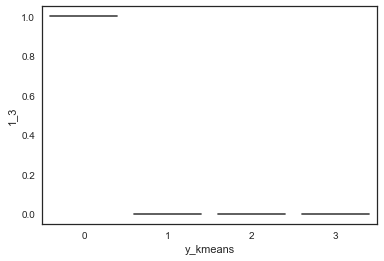

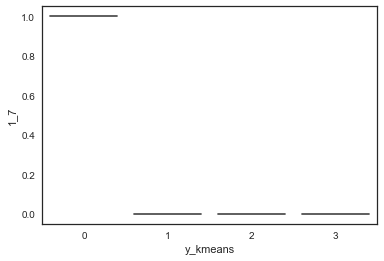

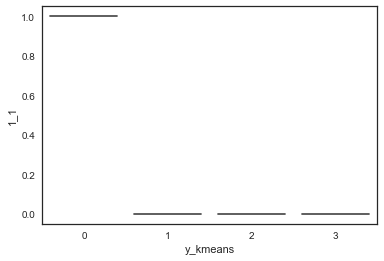

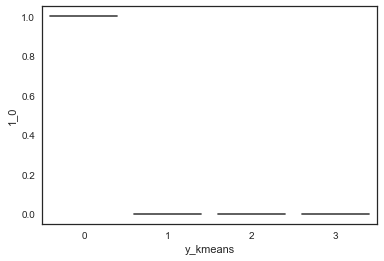

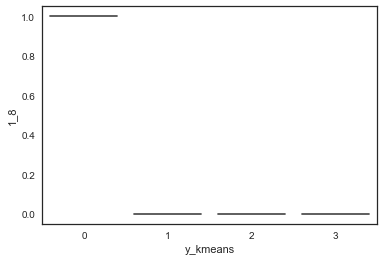

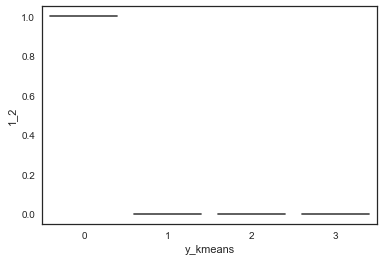

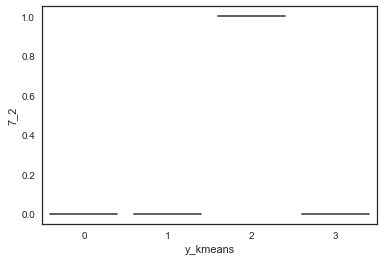

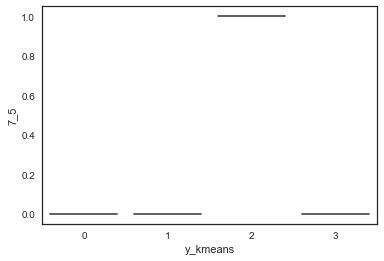

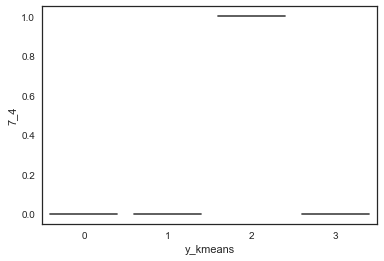

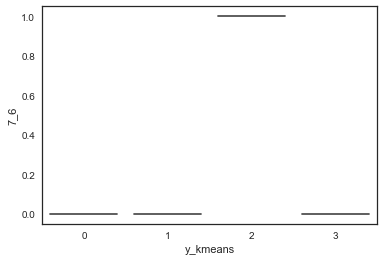

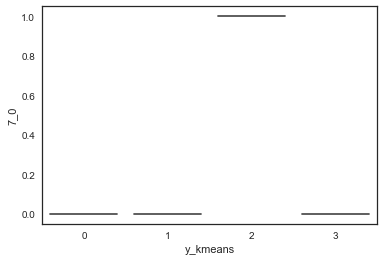

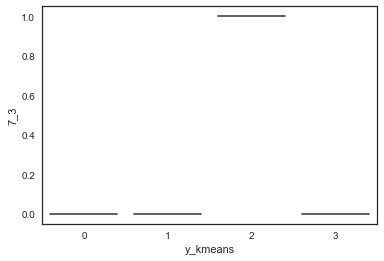

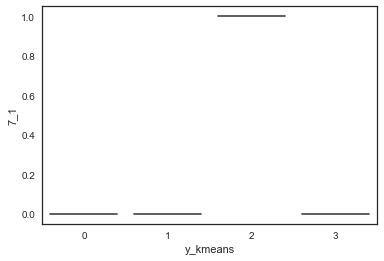

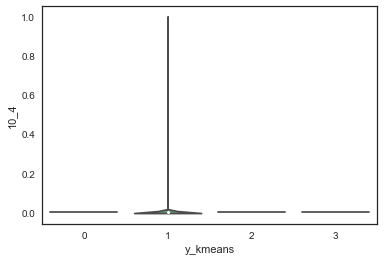

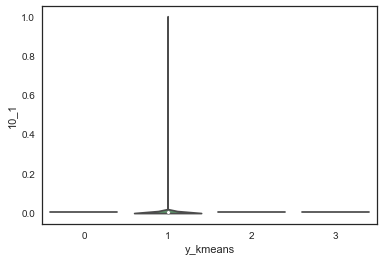

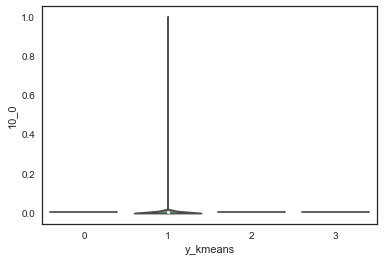

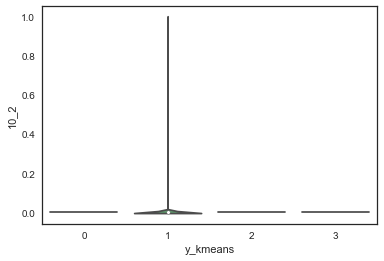

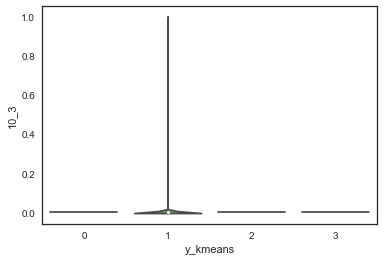

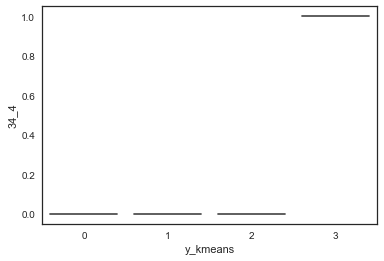

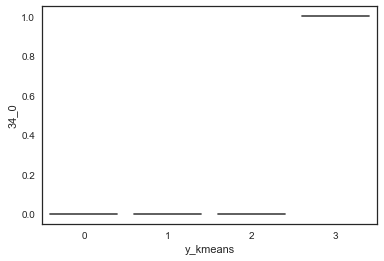

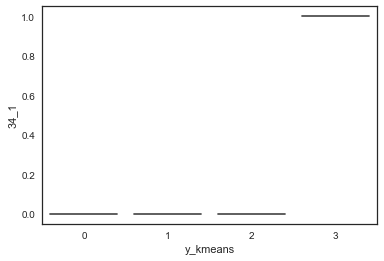

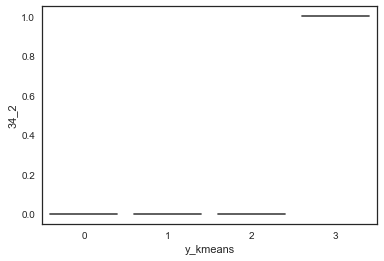

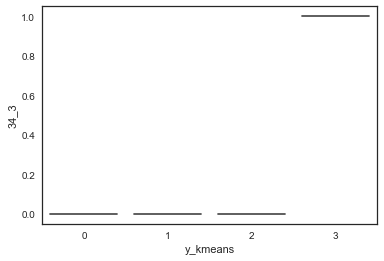

SSE:  3067.1971698697153
# iter:  2
% instances per cluster:  [0.04827363 0.81054419 0.06840786 0.07277432]


In [458]:
gq3_kmeans4 = useKmeans(train_gq3_new,4)

Silhouette Score:  0.70319016307597


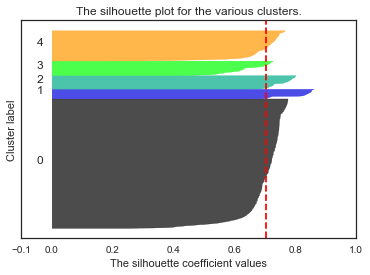

In [459]:
gq3_kmeans_silh5 = silhouette_score(train_gq3_new, gq3_kmeans5)
print("Silhouette Score: ", gq3_kmeans_silh5)
plot_silhouette(train_gq3_new, gq3_kmeans5)

Silhouette Score:  0.7708674240928769


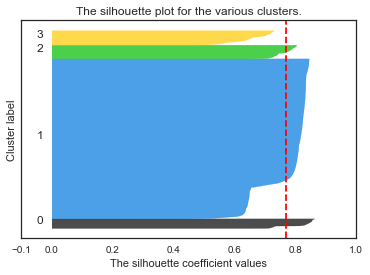

In [460]:
gq3_kmeans_silh4 = silhouette_score(train_gq3_new, gq3_kmeans4)
print("Silhouette Score: ", gq3_kmeans_silh4)
plot_silhouette(train_gq3_new, gq3_kmeans4)

In [461]:
adjusted_rand_score(gq3_kmeans4,gq3_kmeans5)

0.6051284373660941

In [462]:
for i in range(40):
    print(i,homogeneity_score(gq3_kmeans5,train_gq3_init[i]))
for i in range(40):
    print(i,homogeneity_score(gq3_kmeans4,train_gq3_init[i]))

0 0.09385693580118272
1 0.6399524450248972
2 0.47427613069643326
3 0.41417109976077876
4 0.019176684912370137
5 0.022916727468245524
6 0.0003650972591999815
7 0.038362411224850686
8 0.4514578958813197
9 0.3127430194956793
10 0.007465524950568618
11 0.002036808943813121
12 0.37113347891677695
13 0.02269471408626907
14 0.0029343264237979543
15 0.11383412300712786
16 0.03756246077859707
17 0.01627144194366177
18 0.1011809748449972
19 0.07023087098393135
20 0.001503918851820097
21 0.008335368603430373
22 0.07023840300445447
23 0.04590695123125185
24 0.0014513203518298089
25 0.001505003376252074
26 0.0015873585606892514
27 0.0004084565408935972
28 0.0005796273955088122
29 0.15535342442488786
30 0.0002795498504202528
31 0.01202419584919398
32 0.010701044695443711
33 0.01159188518396223
34 0.0016599652210329537
35 0.006702714266922713
36 0.004024745764234068
37 0.0036394146894751407
38 0.1565123669645153
39 0.00018096954524562592
0 0.13965756793360104
1 1.0000000000000016
2 0.693604896853091


In [464]:
def plot_sim_matrix3(X, labels):
    t = labels.reshape(12367, -1)
    X_with_label = np.concatenate((X, t), axis=1)
    X_label_sorted = X_with_label[X_with_label[:, -1].argsort()]
    X_sorted = np.delete(X_label_sorted, -1, 1)
    X_act_sim = cosine_similarity(X_sorted)
    plt.imshow(X_act_sim, cmap=plt.cm.gnuplot2, interpolation='nearest')
    plt.colorbar()
    plt.show()

In [502]:
mds3 = MDS(n_components=2)
train_gq3_mds = mds3.fit_transform(train_gq3_new)

KeyboardInterrupt: 

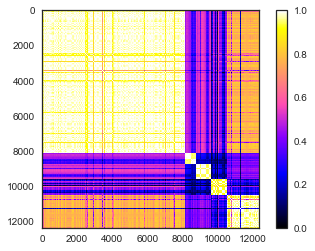

In [465]:
plot_sim_matrix3(train_gq3_new, gq3_kmeans5)

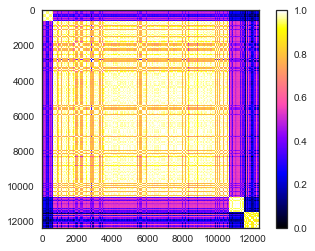

In [466]:
plot_sim_matrix3(train_gq3_new, gq3_kmeans4)

In [ ]:
plt.scatter(train_gq3_mds[:, 0], train_gq3_mds[:, 1], s=20, c=gq3_kmeans5, cmap = "nipy_spectral", edgecolor = "None")
plt.colorbar()
plt.title("MDS plot")
plt.show()

# GQ3@Hierarchical

Time taken:  22.23965
% instances per cluster:  [0.65699038 0.07277432 0.04827363 0.06840786 0.15355381]


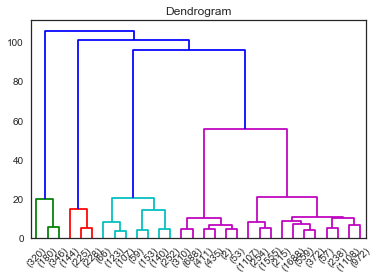

Time taken:  18.15039
% instances per cluster:  [0.81054419 0.07277432 0.04827363 0.06840786]


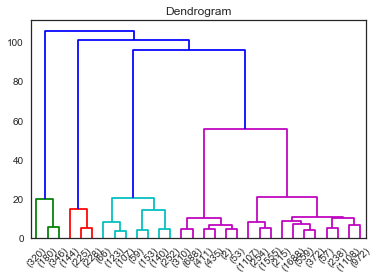

In [467]:
gq3_hier5w = useHierarchical(train_gq3_new,'ward',5)
gq3_hier4w = useHierarchical(train_gq3_new,'ward',4)

Time taken:  18.54293
% instances per cluster:  [7.27743188e-02 8.10382469e-01 6.84078596e-02 4.82736314e-02
 1.61720708e-04]


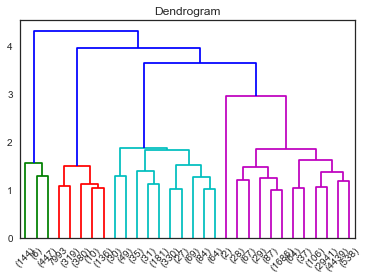

Time taken:  12.81386
% instances per cluster:  [0.81054419 0.07277432 0.06840786 0.04827363]


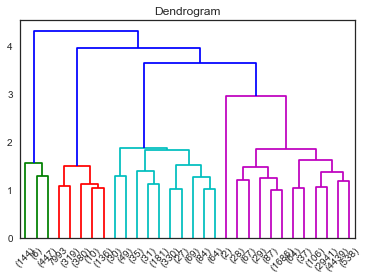

In [468]:
gq3_hier5c = useHierarchical(train_gq3_new,'complete',5)
gq3_hier4c = useHierarchical(train_gq3_new,'complete',4)

Time taken:  14.30354
% instances per cluster:  [7.27743188e-02 8.10382469e-01 6.84078596e-02 1.61720708e-04
 4.82736314e-02]


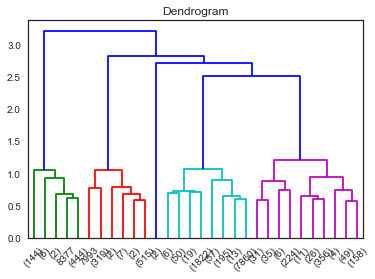

Time taken:  19.53993
% instances per cluster:  [8.83156788e-01 4.82736314e-02 6.84078596e-02 1.61720708e-04]


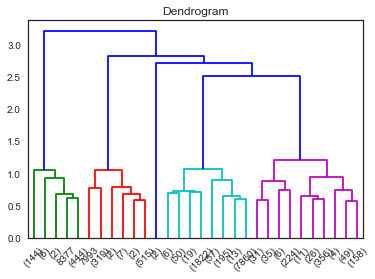

In [469]:
gq3_hier5a = useHierarchical(train_gq3_new,'average',5)
gq3_hier4a = useHierarchical(train_gq3_new,'average',4)

Time taken:  10.12298
% instances per cluster:  [4.82736314e-02 7.27743188e-02 6.84078596e-02 1.61720708e-04
 8.10382469e-01]


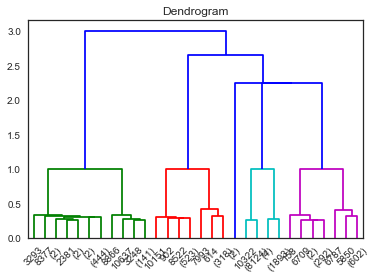

Time taken:  6.14526
% instances per cluster:  [8.83156788e-01 4.82736314e-02 6.84078596e-02 1.61720708e-04]


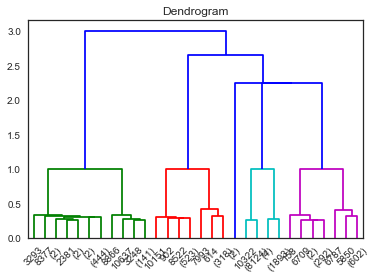

In [470]:
gq3_hier5s = useHierarchical(train_gq3_new,'single',5)
gq3_hier4s = useHierarchical(train_gq3_new,'single',4)

Silhouette Score:  0.70319016307597


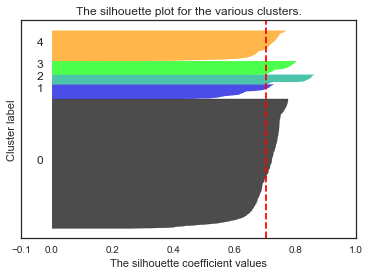

In [471]:
gq3_hier_silh5w = silhouette_score(train_gq3_new, gq3_hier5w)
print("Silhouette Score: ", gq3_hier_silh5w)
plot_silhouette(train_gq3_new, gq3_hier5w)

Silhouette Score:  0.7708674240928769


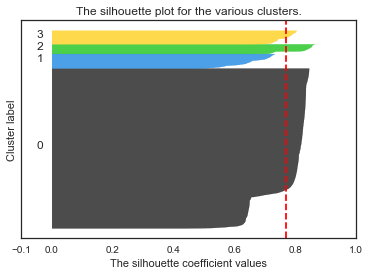

In [472]:
gq3_hier_silh4w = silhouette_score(train_gq3_new, gq3_hier4w)
print("Silhouette Score: ", gq3_hier_silh4w)
plot_silhouette(train_gq3_new, gq3_hier4w)

Silhouette Score:  0.7694841585748222


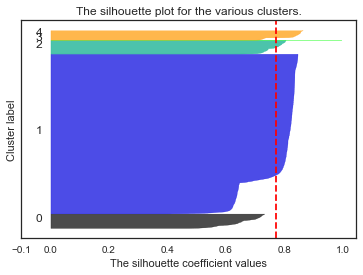

In [473]:
gq3_hier_silh5a = silhouette_score(train_gq3_new, gq3_hier5a)
print("Silhouette Score: ", gq3_hier_silh5a)
plot_silhouette(train_gq3_new, gq3_hier5a)

Silhouette Score:  0.7042300151660514


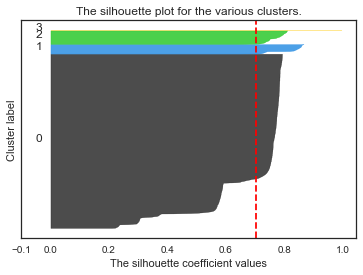

In [474]:
gq3_hier_silh4a = silhouette_score(train_gq3_new, gq3_hier4a)
print("Silhouette Score: ", gq3_hier_silh4a)
plot_silhouette(train_gq3_new, gq3_hier4a)

Silhouette Score:  0.7694841585748222


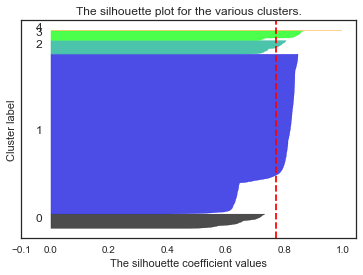

In [475]:
gq3_hier_silh5c = silhouette_score(train_gq3_new, gq3_hier5c)
print("Silhouette Score: ", gq3_hier_silh5c)
plot_silhouette(train_gq3_new, gq3_hier5c)

Silhouette Score:  0.7708674240928769


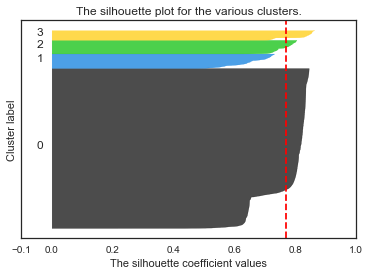

In [477]:
gq3_hier_silh4c = silhouette_score(train_gq3_new, gq3_hier4c)
print("Silhouette Score: ", gq3_hier_silh4c)
plot_silhouette(train_gq3_new, gq3_hier4c)

Silhouette Score:  0.7694841585748222


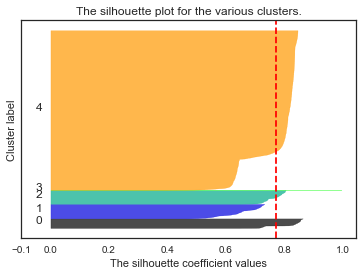

In [476]:
gq3_hier_silh5s = silhouette_score(train_gq3_new, gq3_hier5s)
print("Silhouette Score: ", gq3_hier_silh5s)
plot_silhouette(train_gq3_new, gq3_hier5s)

Silhouette Score:  0.7042300151660514


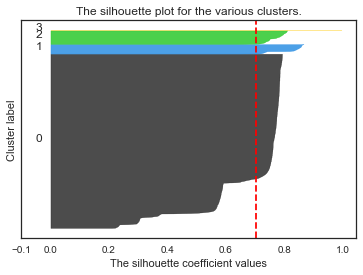

In [478]:
gq3_hier_silh4s = silhouette_score(train_gq3_new, gq3_hier4s)
print("Silhouette Score: ", gq3_hier_silh4s)
plot_silhouette(train_gq3_new, gq3_hier4s)

In [479]:
print(adjusted_rand_score(gq3_hier4s,gq3_hier4c))
print(adjusted_rand_score(gq3_hier4s,gq3_hier4a))
print(adjusted_rand_score(gq3_hier4s,gq3_hier4w))
print(adjusted_rand_score(gq3_hier4c,gq3_hier4a))
print(adjusted_rand_score(gq3_hier4c,gq3_hier4w))
print(adjusted_rand_score(gq3_hier4a,gq3_hier4w))

0.7065424484985742
1.0
0.7065424484985742
0.7065424484985742
1.0
0.7065424484985742


In [480]:
print(adjusted_rand_score(gq3_hier5s,gq3_hier5c))
print(adjusted_rand_score(gq3_hier5s,gq3_hier5a))
print(adjusted_rand_score(gq3_hier5s,gq3_hier5w))
print(adjusted_rand_score(gq3_hier5c,gq3_hier5a))
print(adjusted_rand_score(gq3_hier5c,gq3_hier5w))
print(adjusted_rand_score(gq3_hier5a,gq3_hier5w))

1.0
1.0
0.6054340488623835
1.0
0.6054340488623835
0.6054340488623835


In [481]:
print(adjusted_rand_score(gq3_hier5s,gq3_hier4s))
print(adjusted_rand_score(gq3_hier5c,gq3_hier4c))
print(adjusted_rand_score(gq3_hier5a,gq3_hier4a))
print(adjusted_rand_score(gq3_hier5w,gq3_hier4w))

0.7073024347280362
0.9994079982821715
0.7073024347280362
0.6051284373660941


In [482]:
for i in range(40):
    print("s:",i,homogeneity_score(gq3_hier5s,train_gq3_init[i]))
for i in range(40):
    print("c:",i,homogeneity_score(gq3_hier5c,train_gq3_init[i]))
for i in range(40):
    print("a:",i,homogeneity_score(gq3_hier5a,train_gq3_init[i]))
for i in range(40):
    print("w:",i,homogeneity_score(gq3_hier5w,train_gq3_init[i]))

s: 0 0.14082731864625
s: 1 1.0000000000000002
s: 2 0.694286250958536
s: 3 0.570828639980585
s: 4 0.026919144749620042
s: 5 0.022728043714387587
s: 6 0.0018704029851225057
s: 7 0.026582800512707144
s: 8 0.6639295234836816
s: 9 0.45878311609848527
s: 10 0.00789987768839995
s: 11 0.0035477423969102855
s: 12 0.013290362703923822
s: 13 0.035179414123806985
s: 14 0.005648180273700887
s: 15 0.17778032674828548
s: 16 0.03747456295212332
s: 17 0.012896218311295836
s: 18 0.12055349758341946
s: 19 0.07449917388303598
s: 20 0.0021465828468681023
s: 21 0.010007398415542539
s: 22 0.010399037488414802
s: 23 0.004390521077633058
s: 24 0.001980941378071304
s: 25 0.0021063837198446924
s: 26 0.002216514108717004
s: 27 0.000497002604499146
s: 28 0.0007053141290979056
s: 29 0.24197152414604894
s: 30 4.9119087173649655e-05
s: 31 0.015064021896370572
s: 32 0.014023823932533869
s: 33 0.013529619405204498
s: 34 0.002568409587996619
s: 35 0.009294095564232436
s: 36 0.004167982321177963
s: 37 0.00381795633901429

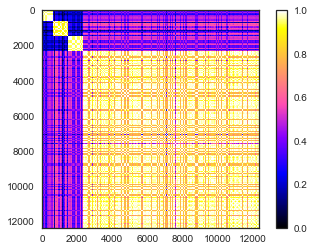

In [483]:
plot_sim_matrix3(train_gq3_new, gq3_hier5s)

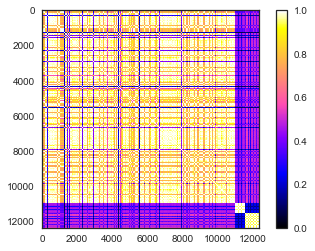

In [484]:
plot_sim_matrix3(train_gq3_new, gq3_hier4s)

In [ ]:
plt.scatter(train_gq3_mds[:, 0], train_gq3_mds[:, 1], s=20, c=gq3_hier5s, cmap = "nipy_spectral", edgecolor = "None")
plt.colorbar()
plt.title("MDS plot")
plt.show()

# GQ3@DBSCAN

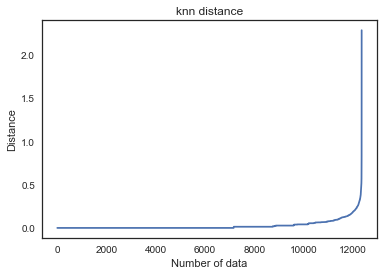

In [485]:
plot_knn_distance(train_gq3_new,k=10)

In [487]:
gq3_dbs1 = useDBSCAN(train_gq3_new,0.3,300)

Time taken:  12.31195
% instances per cluster:  [0.65084499 0.14951079 0.04091534 0.03541684 0.02724994]
% of noise:  0.09606210075200129


In [490]:
gq3_dbs2 = useDBSCAN(train_gq3_new,0.4,400)

Time taken:  19.85747
% instances per cluster:  [0.6540794  0.15185575 0.0418048  0.03582114]
% of noise:  0.11643891000242582


Silhouette Score:  0.6007687172954949


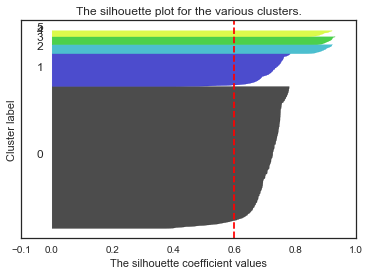

In [491]:
gq3_dbs_silh1 = silhouette_score(train_gq3_new, gq3_dbs1)
print("Silhouette Score: ", gq3_dbs_silh1)
plot_silhouette(train_gq3_new, gq3_dbs1)

Silhouette Score:  0.6231704360066828


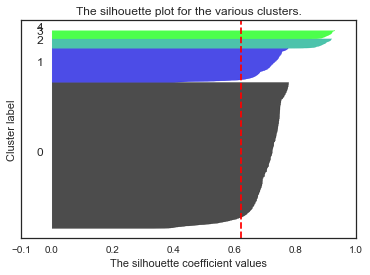

In [492]:
gq3_dbs_silh2 = silhouette_score(train_gq3_new, gq3_dbs2)
print("Silhouette Score: ", gq3_dbs_silh2)
plot_silhouette(train_gq3_new, gq3_dbs2)

In [493]:
print(adjusted_rand_score(gq3_dbs1,gq3_dbs2))

0.9776181782426017


In [494]:
print(adjusted_rand_score(gq3_hier4a,gq3_dbs2))
print(adjusted_rand_score(gq3_hier5s,gq3_dbs2))

print(adjusted_rand_score(gq3_kmeans5,gq3_dbs2))
print(adjusted_rand_score(gq3_kmeans4,gq3_dbs2))

print(adjusted_rand_score(gq3_kmeans5,gq3_hier5s))
print(adjusted_rand_score(gq3_kmeans4,gq3_hier4s))

0.3580078798105514
0.5766557648828821
0.9702155760777588
0.5761625901504427
0.6054340488623835
0.7065424484985742


In [495]:
for i in range(40):
    print("1:",i,homogeneity_score(gq3_dbs1,train_gq3_init[i]))
for i in range(40):
    print("2:",i,homogeneity_score(gq3_dbs2,train_gq3_init[i]))

1: 0 0.08764982623894645
1: 1 0.5094504033972317
1: 2 0.3796604794702054
1: 3 0.33397263474627276
1: 4 0.019748860428761447
1: 5 0.02301425869118466
1: 6 0.0010190987399119264
1: 7 0.03772240818093339
1: 8 0.35869847580961456
1: 9 0.24223420364949313
1: 10 0.006676913070655242
1: 11 0.0019913066811488925
1: 12 0.4053199220499001
1: 13 0.014393266819521591
1: 14 0.002035428101176533
1: 15 0.08508500184933812
1: 16 0.03977046253855729
1: 17 0.016575728895576246
1: 18 0.10239641625640811
1: 19 0.07238905355856982
1: 20 0.0013963742346906837
1: 21 0.008081141135450914
1: 22 0.07657224298863015
1: 23 0.049385283266589426
1: 24 0.001747810574282831
1: 25 0.0017228549703961385
1: 26 0.001609059105093504
1: 27 0.0006019494754867144
1: 28 0.000778496905770316
1: 29 0.13931885496040816
1: 30 0.0003336327419185904
1: 31 0.010931889061924103
1: 32 0.010165187435703136
1: 33 0.011088814259065124
1: 34 0.0017102600683378919
1: 35 0.006660129933416212
1: 36 0.005149263393466762
1: 37 0.00474809777705

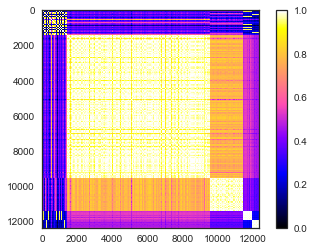

In [496]:
plot_sim_matrix3(train_gq3_new, gq3_dbs2)

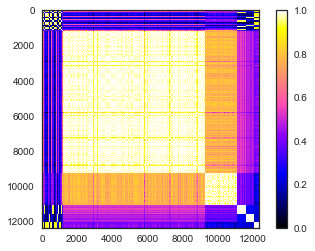

In [497]:
plot_sim_matrix3(train_gq3_new, gq3_dbs1)

In [ ]:
plt.scatter(train_gq3_mds[:, 0], train_gq3_mds[:, 1], s=20, c=gq3_dbs2, cmap = "nipy_spectral", edgecolor = "None")
plt.colorbar()
plt.title("MDS plot")
plt.show()